# 21BDS0379

# SHREYASHA SHRESTHA

# EDA THEORY- D1

### GITHUB LINK: https://github.com/shreyashax/21BDS0379_EDA_Theory_DA/tree/main

### DATASET NAME: student-mat.csv

### DATASET LINK: https://raw.githubusercontent.com/salemprakash/EDA/main/Data/student-mat.csv



## Digital Assignment 1

#PHASE 1

Module 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv('MyDataset_EDA.csv')

In [ ]:
# Display basic info
df.info()
print("\nSummary Statistics:")
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         393 non-null    object
 2   age         395 non-null    int64 
 3   address     394 non-null    object
 4   famsize     394 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   393 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
# Handling missing values
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
df['address'].fillna(df['address'].mode()[0], inplace=True)
df['famsize'].fillna(df['famsize'].mode()[0], inplace=True)
df['schoolsup'].fillna(df['schoolsup'].mode()[0], inplace=True)

<ipython-input-4-f698c8d2acdd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(df['sex'].mode()[0], inplace=True)
<ipython-input-4-f698c8d2acdd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

In [ ]:
# Convert data types if needed
def convert_dtype(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_datetime(df[col])  # Convert date-like columns
            except:
                pass  # If conversion fails, leave as object
        elif df[col].dtype in ['int64', 'float64']:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert numeric values
    return df

df = convert_dtype(df)

<ipython-input-6-369a7d50bdcc>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])  # Convert date-like columns
<ipython-input-6-369a7d50bdcc>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])  # Convert date-like columns
<ipython-input-6-369a7d50bdcc>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])  # Convert date-like columns
<ipython-input-6-369a7d50bdcc>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensu

In [ ]:
# Handling outliers (Removing values beyond 1.5*IQR)
def remove_outliers(df):
    for col in ['absences']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df = remove_outliers(df)

In [ ]:
# Encoding categorical variables
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes


Module 3

Univariate Analysis

In [ ]:
data = pd.read_csv('MyDataset_EDA.csv')
# Central Tendency Measures
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"\n{col}:")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode()[0]}")

# Dispersion Measures
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"\n{col}:")
    print(f"Range: {df[col].max() - df[col].min()}")
    print(f"Variance: {df[col].var()}")
    print(f"Standard Deviation: {df[col].std()}")
    print(f"Min: {df[col].min()}")
    print(f"Max: {df[col].max()}")
    print(f"Q1: {df[col].quantile(0.25)}")
    print(f"Q3: {df[col].quantile(0.75)}")
    print(f"IQR: {df[col].quantile(0.75) - df[col].quantile(0.25)}")



age:
Mean: 16.67105263157895
Median: 17.0
Mode: 16

Medu:
Mean: 2.7263157894736842
Median: 3.0
Mode: 4

Fedu:
Mean: 2.5078947368421054
Median: 2.0
Mode: 2

traveltime:
Mean: 1.444736842105263
Median: 1.0
Mode: 1

studytime:
Mean: 2.042105263157895
Median: 2.0
Mode: 2

failures:
Mean: 0.3263157894736842
Median: 0.0
Mode: 0

famrel:
Mean: 3.9473684210526314
Median: 4.0
Mode: 4

freetime:
Mean: 3.2605263157894737
Median: 3.0
Mode: 3

goout:
Mean: 3.107894736842105
Median: 3.0
Mode: 3

Dalc:
Mean: 1.481578947368421
Median: 1.0
Mode: 1

Walc:
Mean: 2.278947368421053
Median: 2.0
Mode: 1

health:
Mean: 3.5710526315789473
Median: 4.0
Mode: 5

absences:
Mean: 4.602631578947369
Median: 3.0
Mode: 0

G1:
Mean: 10.921052631578947
Median: 11.0
Mode: 10

G2:
Mean: 10.723684210526315
Median: 11.0
Mode: 9

G3:
Mean: 10.421052631578947
Median: 11.0
Mode: 10

age:
Range: 7
Variance: 1.625017358700184
Standard Deviation: 1.2747616870223955
Min: 15
Max: 22
Q1: 16.0
Q3: 18.0
IQR: 2.0

Medu:
Range: 4
Varian

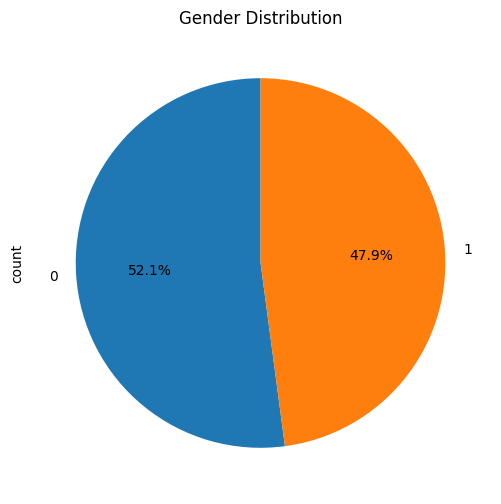

In [ ]:
# Visualization: Pie Chart of Gender distribution
plt.figure(figsize=(6,6))
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.show()

<ipython-input-11-5f46bd061d41>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[cat_col].astype(str), palette='coolwarm')


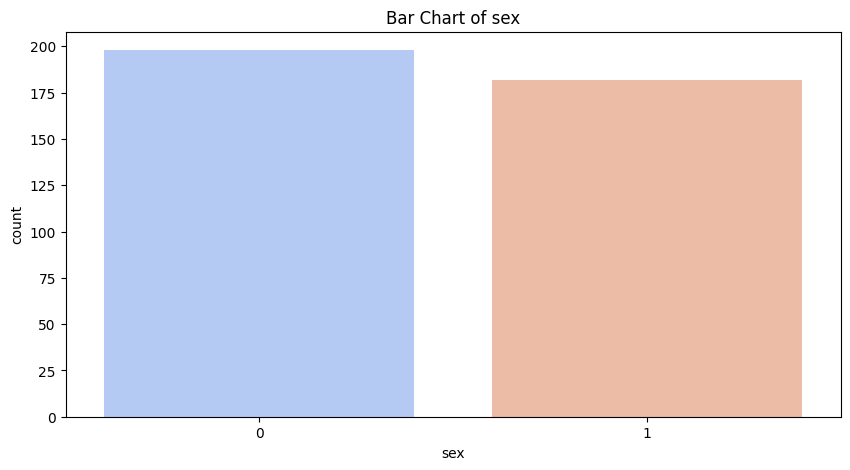

<ipython-input-11-5f46bd061d41>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[cat_col].astype(str), palette='coolwarm')


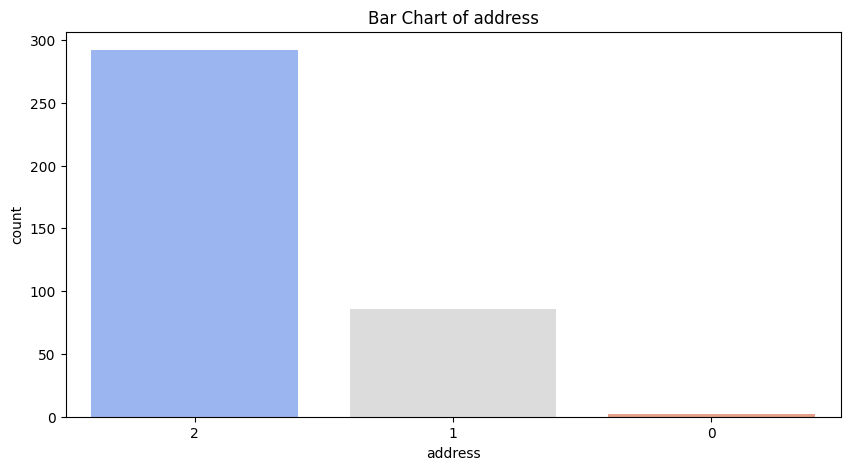

<ipython-input-11-5f46bd061d41>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[cat_col].astype(str), palette='coolwarm')


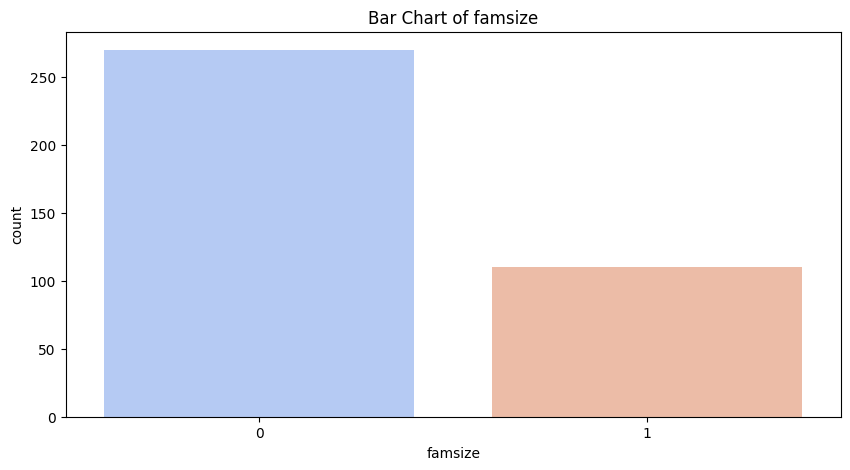

<ipython-input-11-5f46bd061d41>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[cat_col].astype(str), palette='coolwarm')


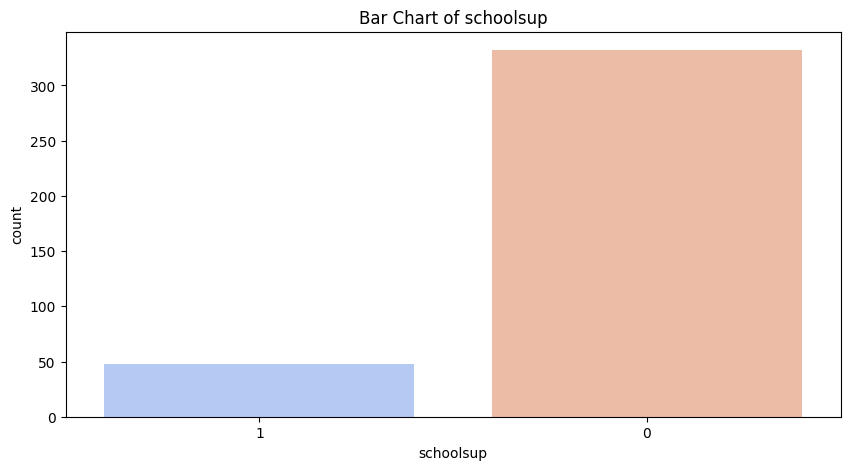

Column 'age_group' not found in DataFrame, skipping.


In [ ]:
categorical_cols = ['sex', 'address', 'famsize', 'schoolsup', 'age_group']
for cat_col in categorical_cols:
    if cat_col in df.columns:
        plt.figure(figsize=(10,5))
        sns.countplot(x=df[cat_col].astype(str), palette='coolwarm')
        plt.title(f'Bar Chart of {cat_col}')
        plt.show()
    else:
        print(f"Column '{cat_col}' not found in DataFrame, skipping.")


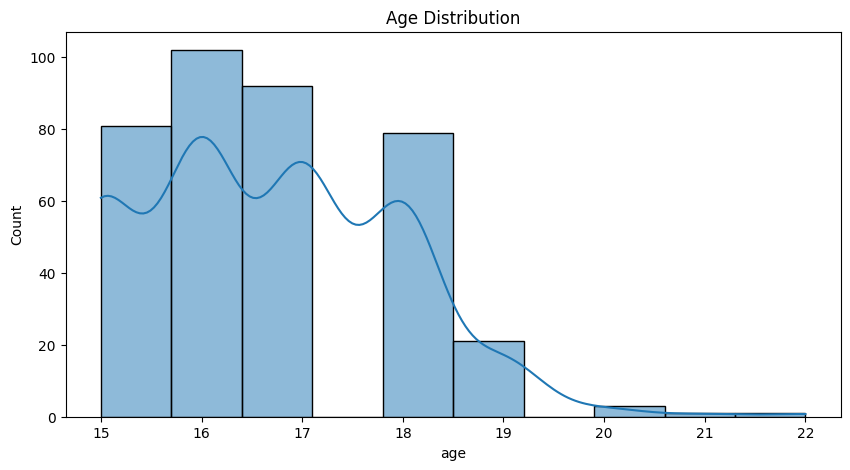

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.show()

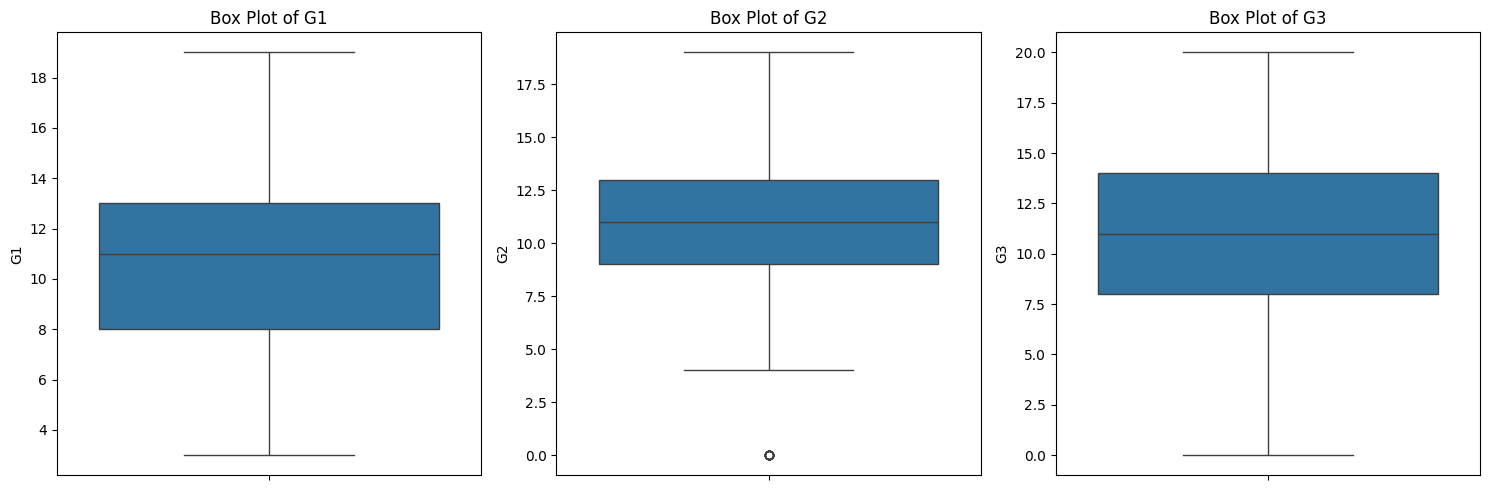

In [ ]:
# Select three numeric columns for boxplots (replace with your desired columns)
columns_for_boxplots = ['G1', 'G2', 'G3']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(columns_for_boxplots):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


Bivariate Analysis

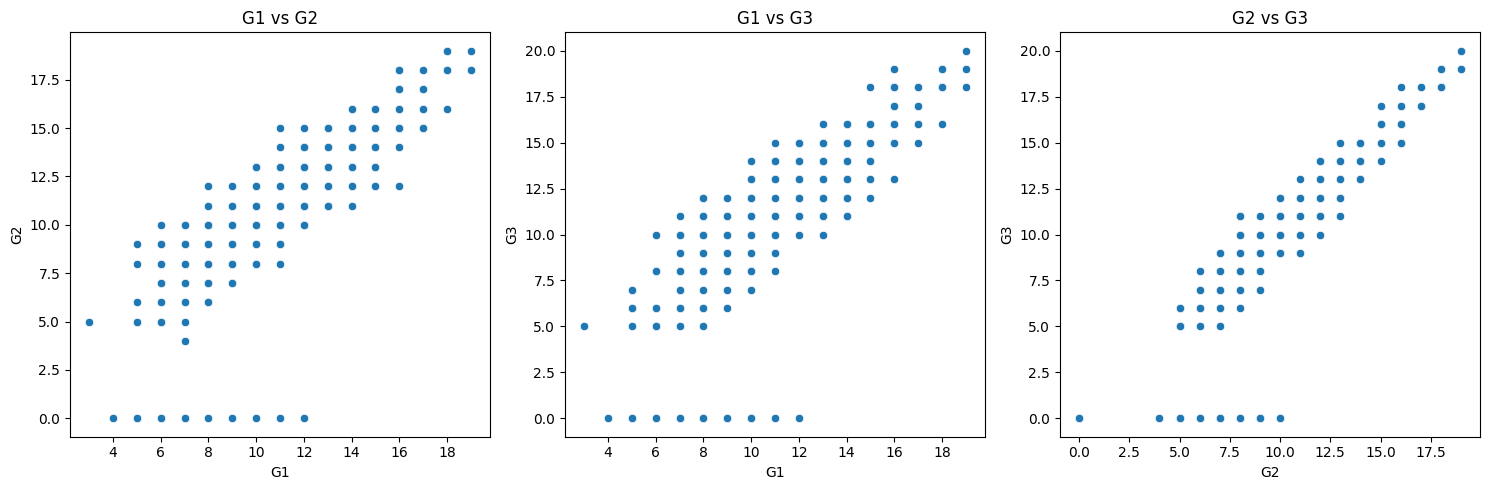

In [ ]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot: G1 vs G2
sns.scatterplot(x='G1', y='G2', data=df, ax=axes[0])
axes[0].set_title('G1 vs G2')

# Scatter plot: G1 vs G3
sns.scatterplot(x='G1', y='G3', data=df, ax=axes[1])
axes[1].set_title('G1 vs G3')

# Scatter plot: G2 vs G3
sns.scatterplot(x='G2', y='G3', data=df, ax=axes[2])
axes[2].set_title('G2 vs G3')

plt.tight_layout()
plt.show()


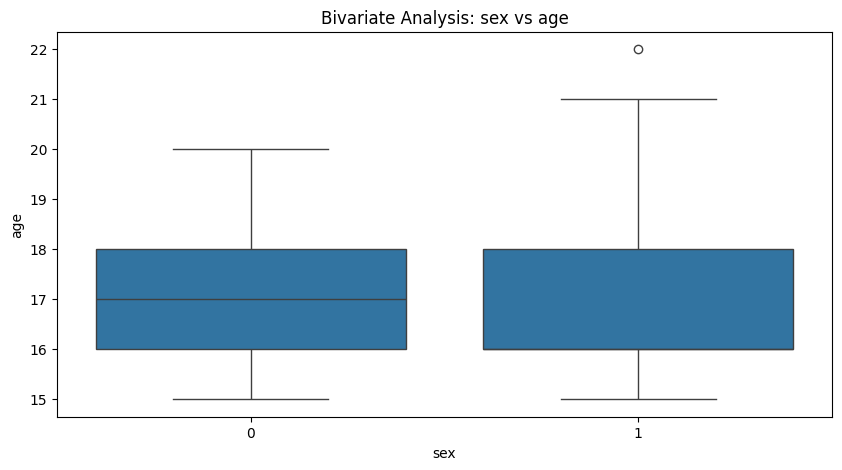

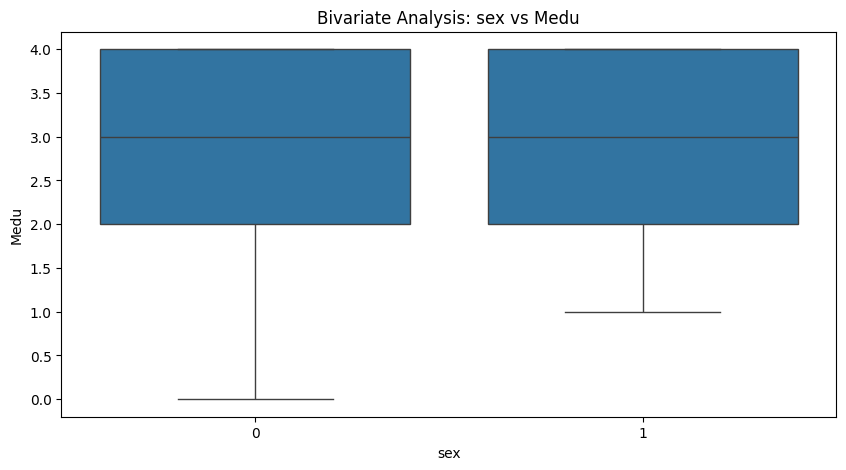

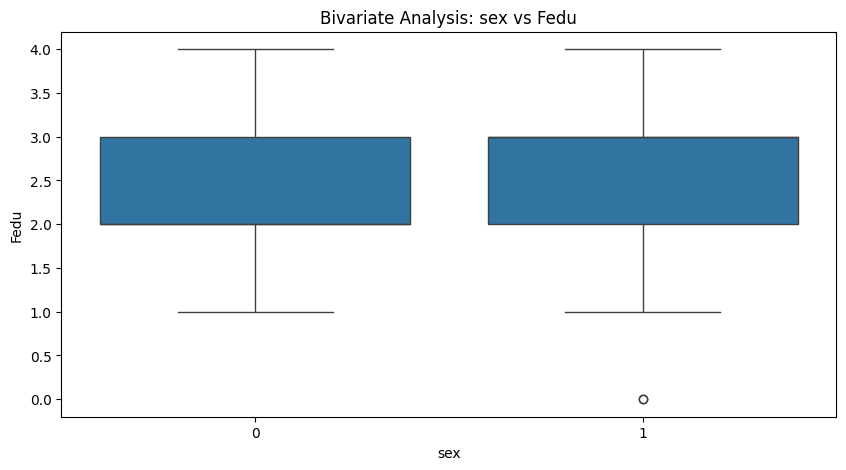

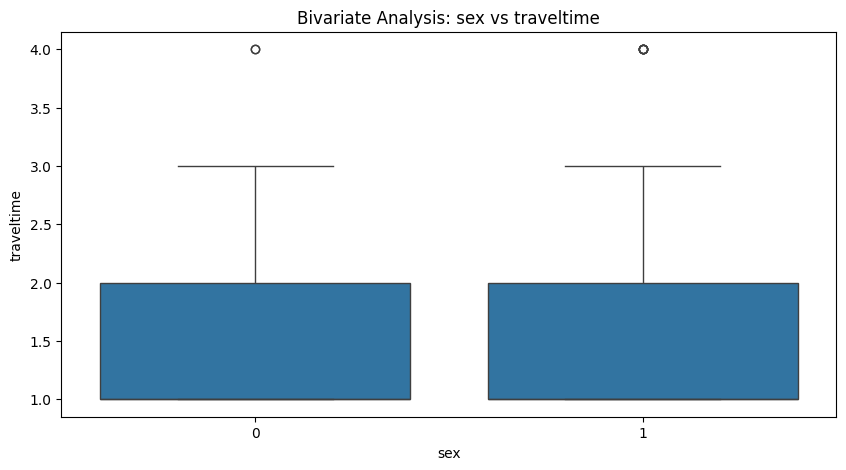

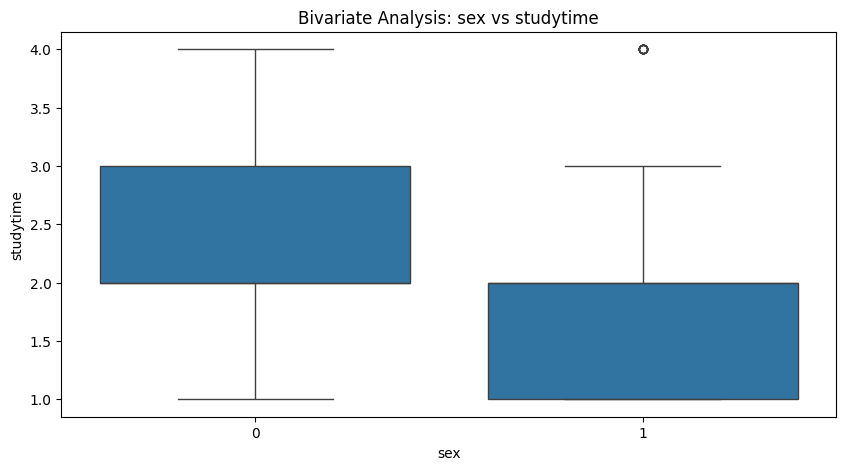

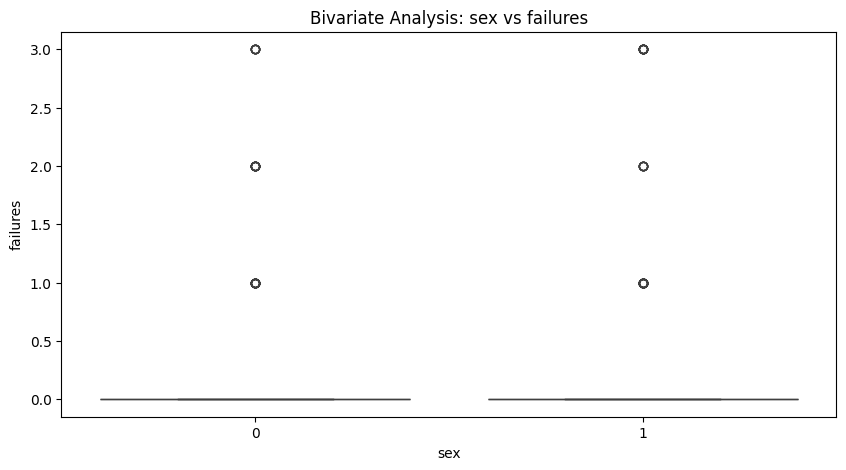

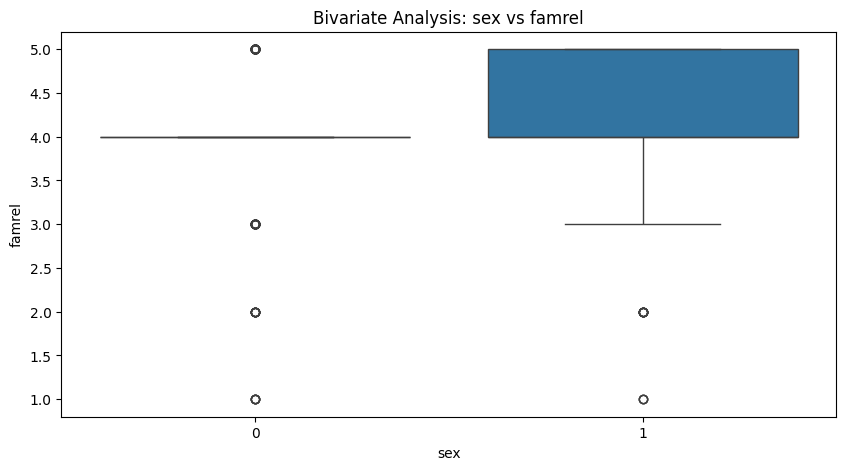

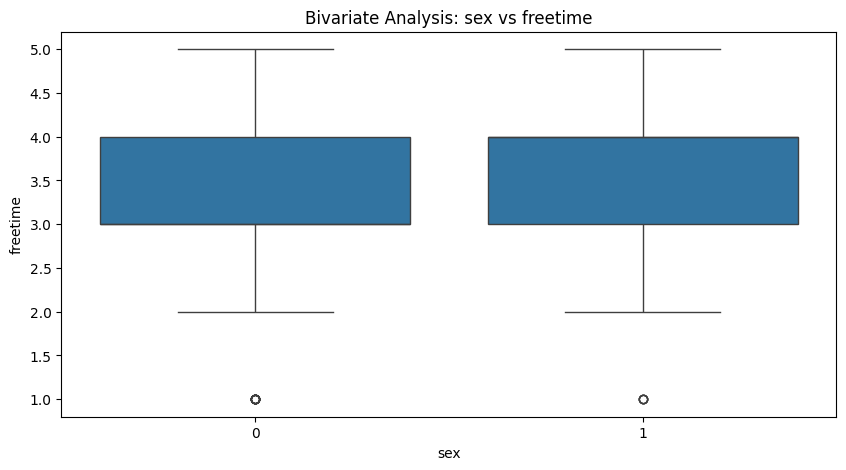

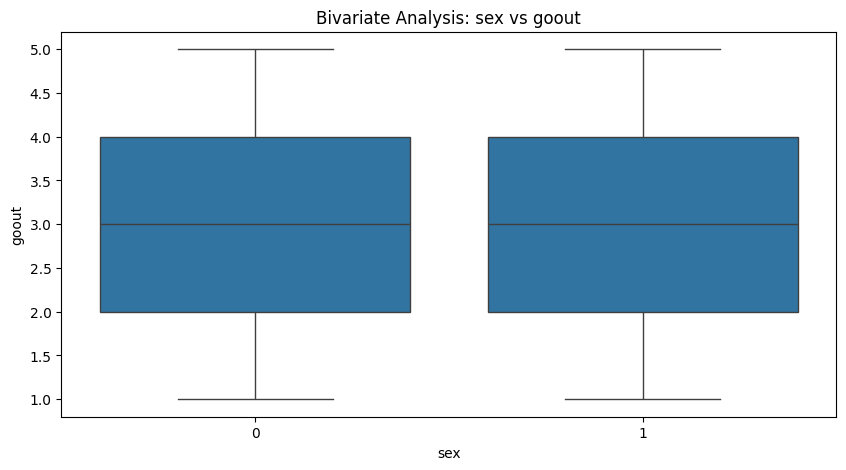

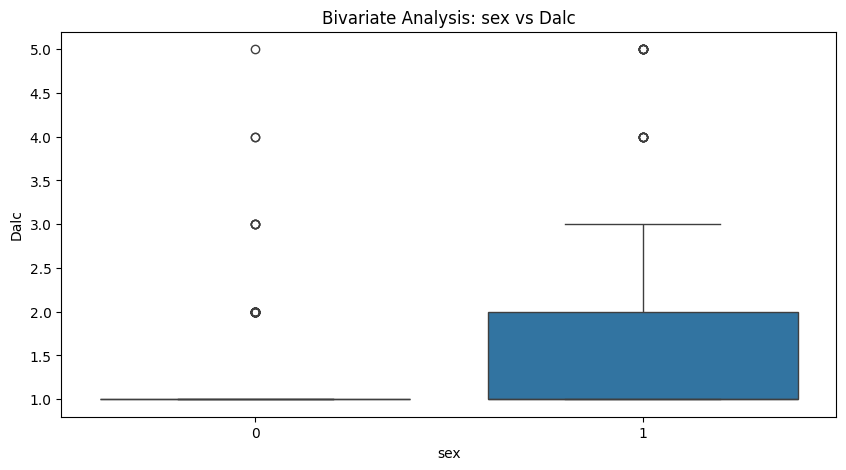

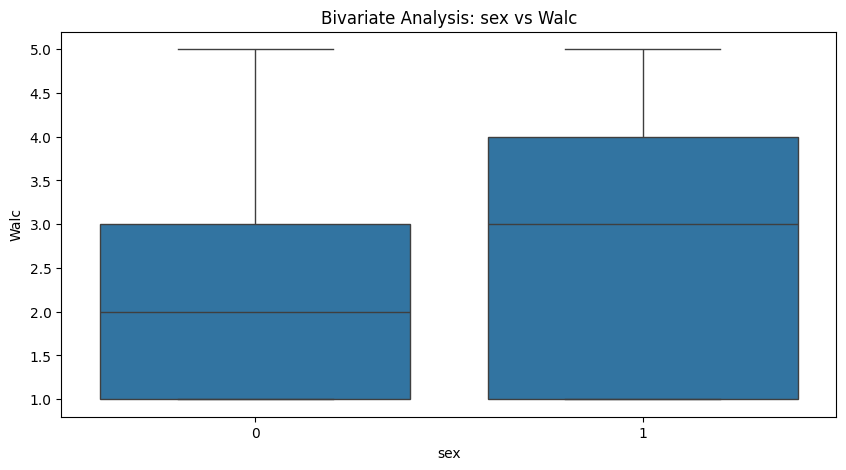

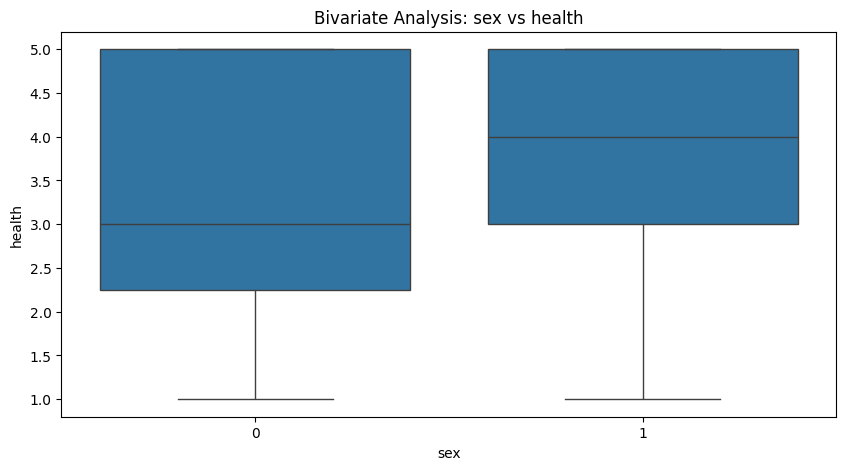

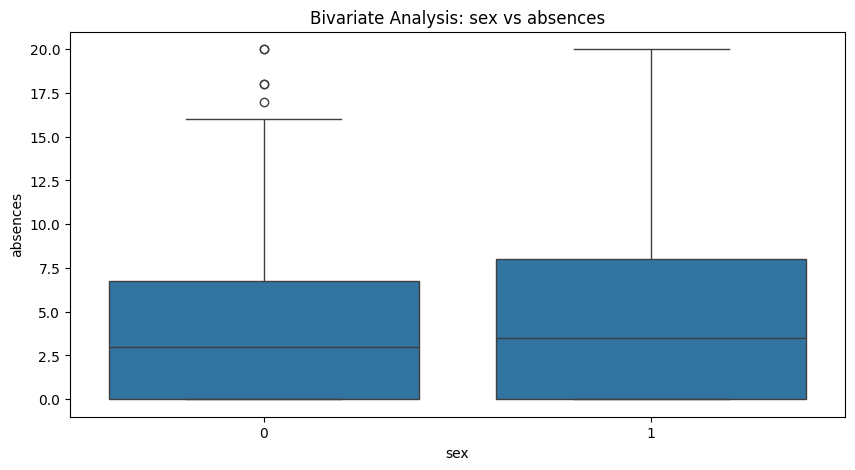

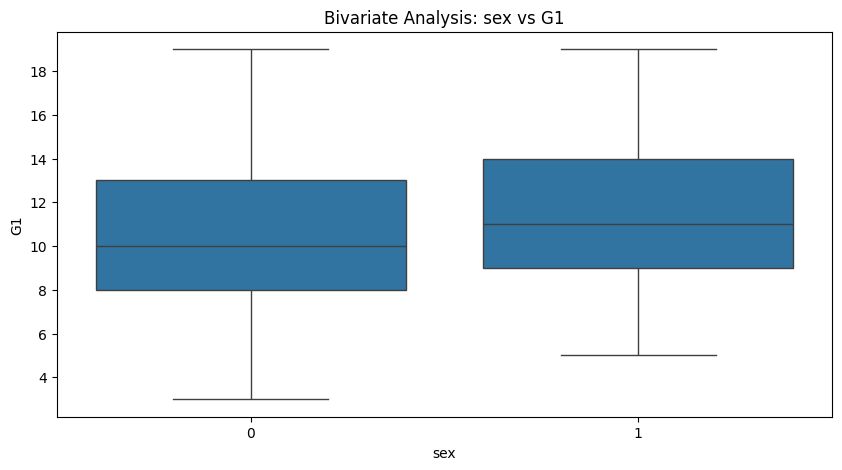

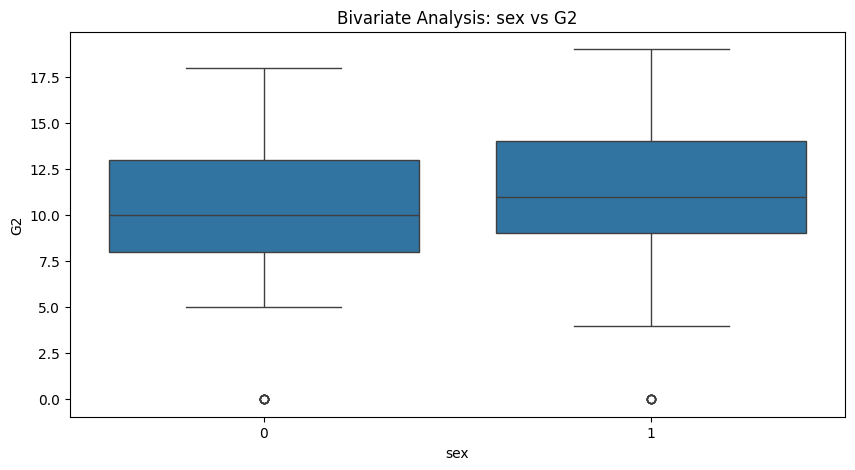

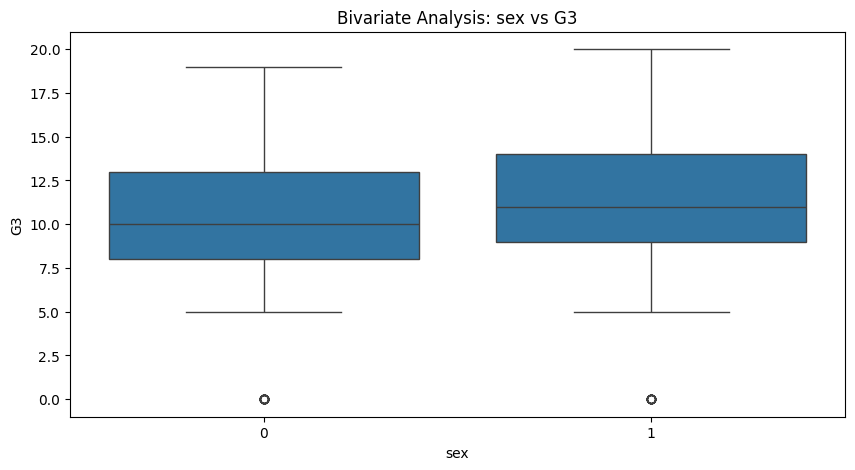

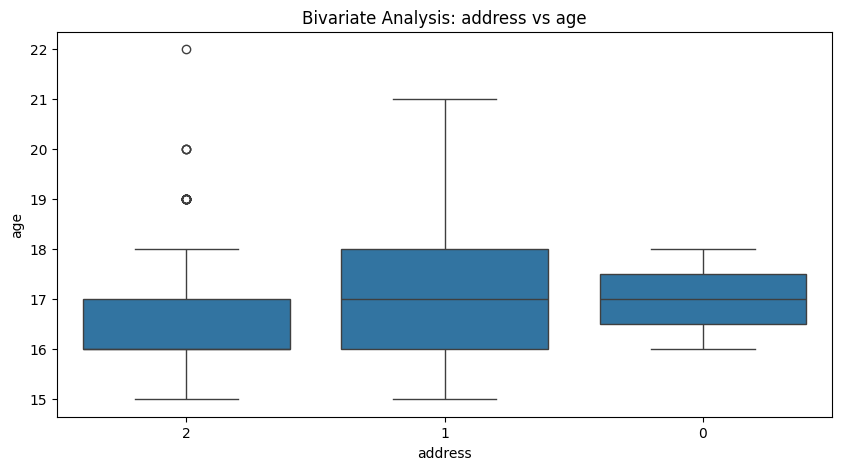

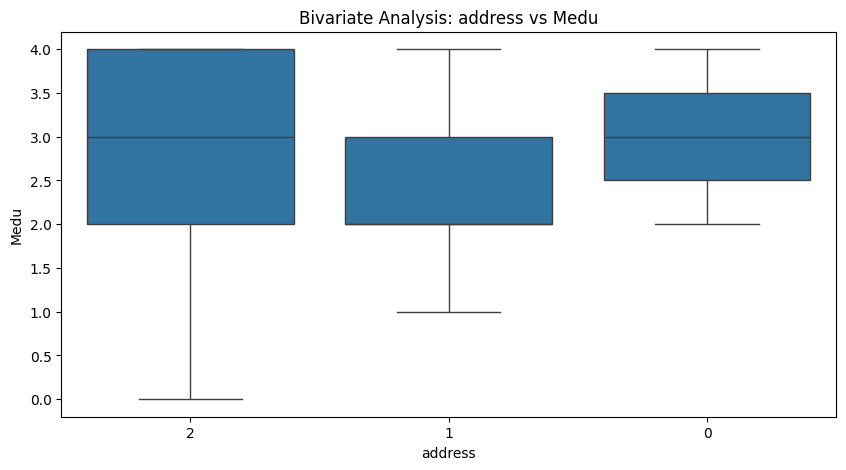

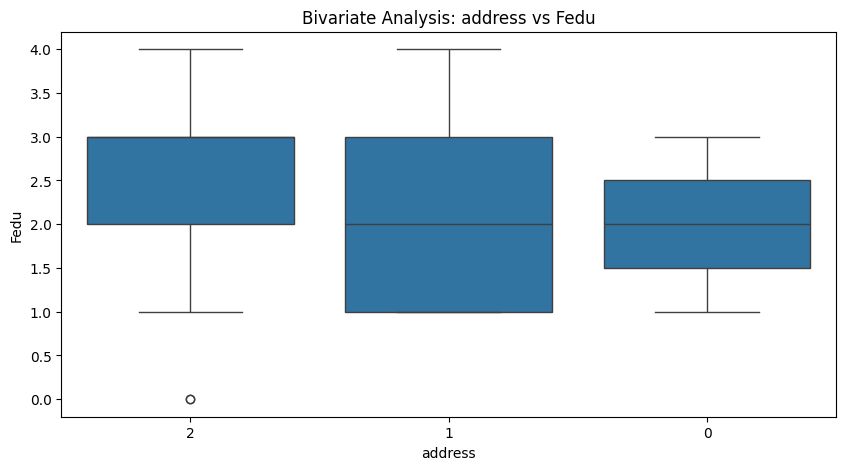

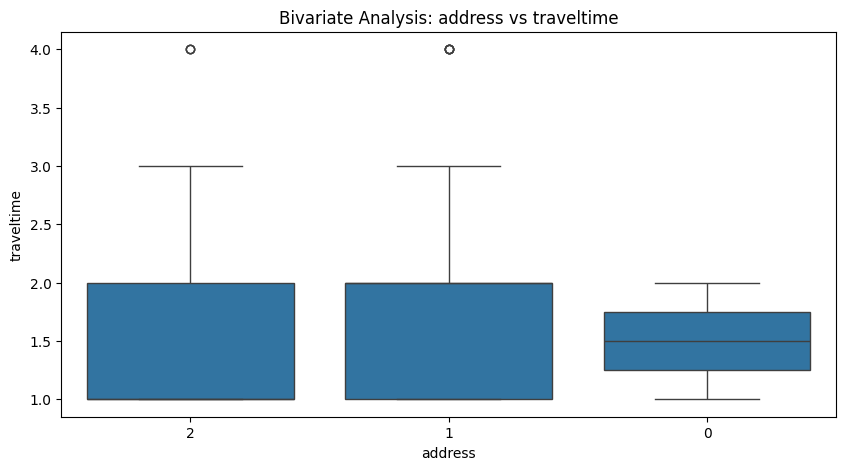

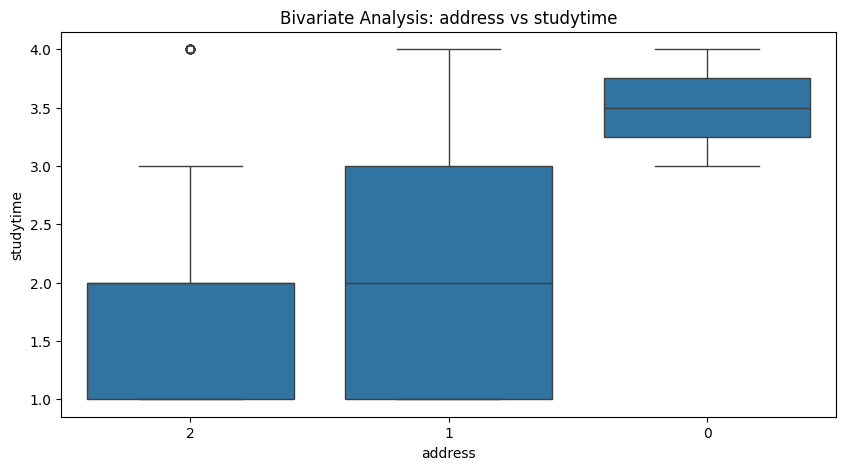

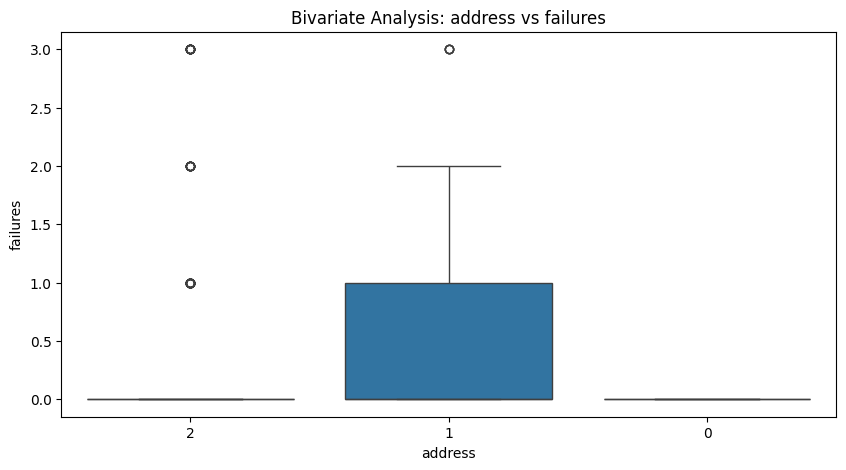

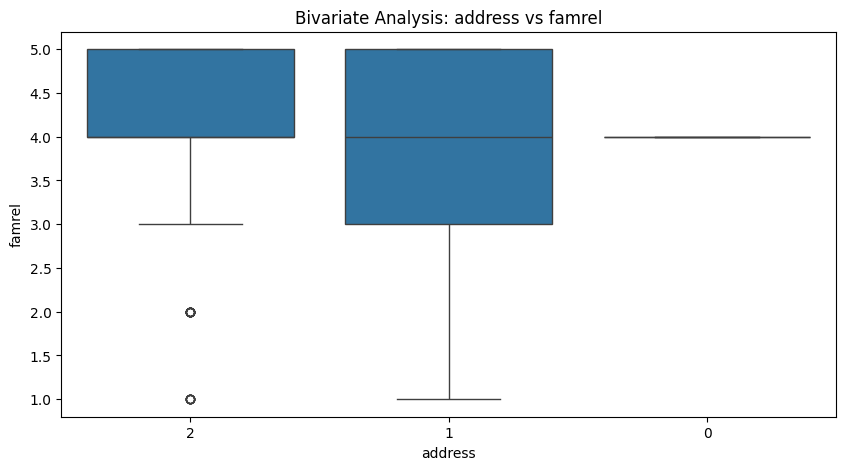

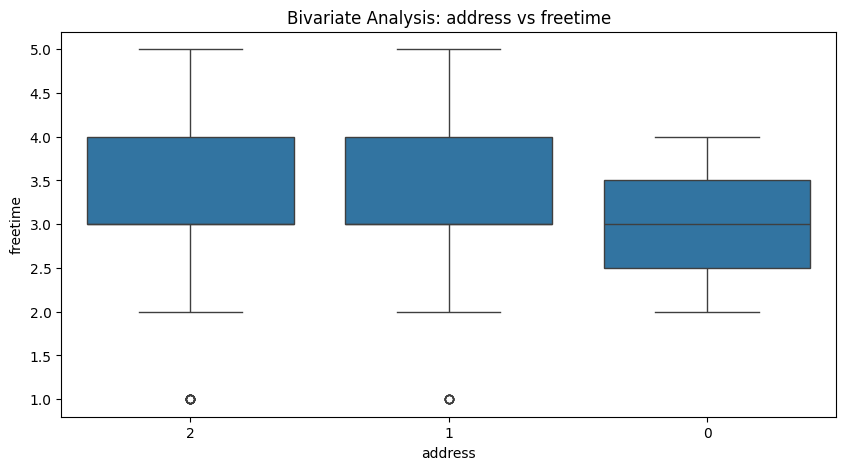

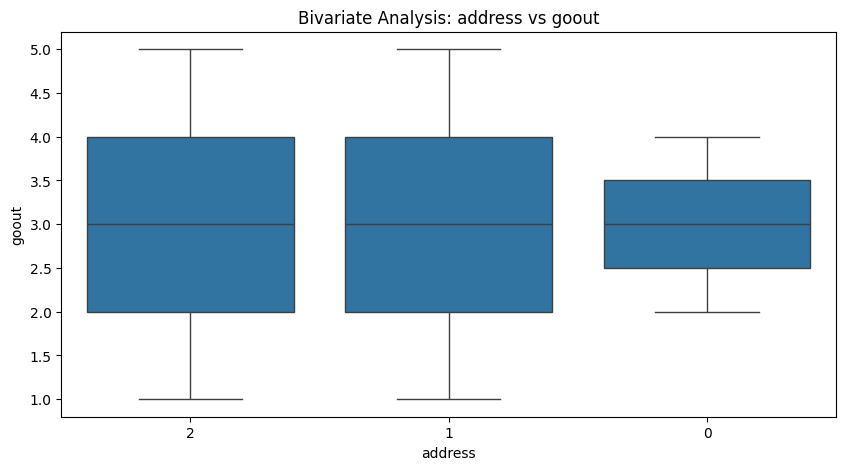

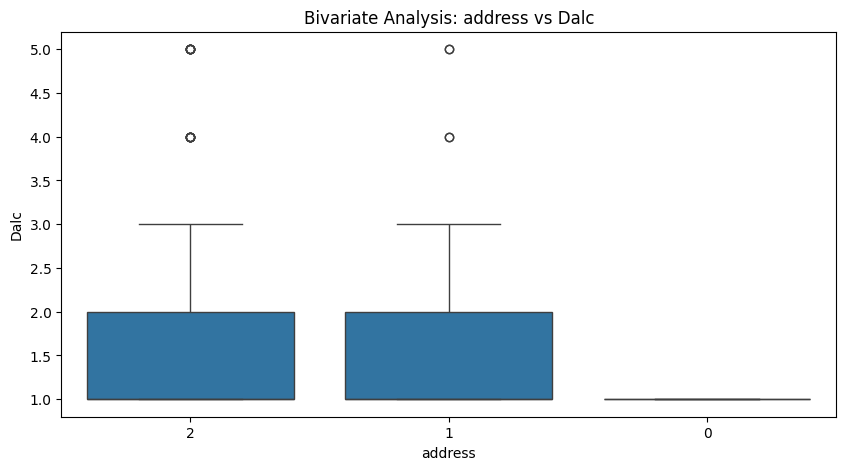

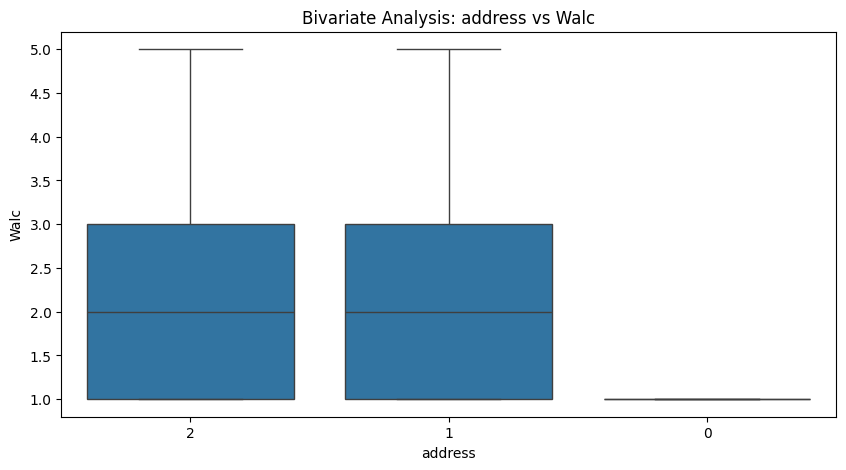

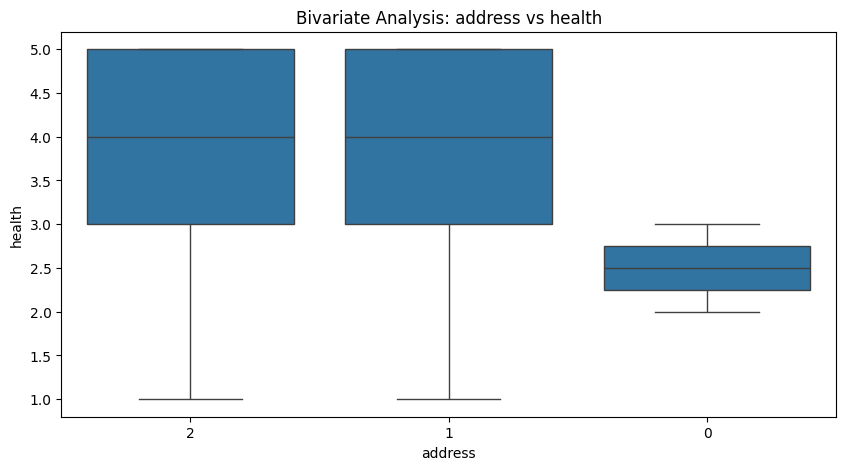

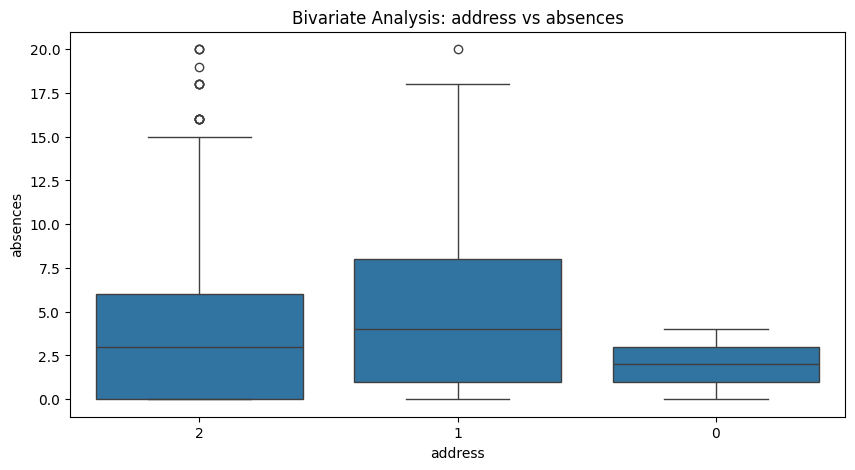

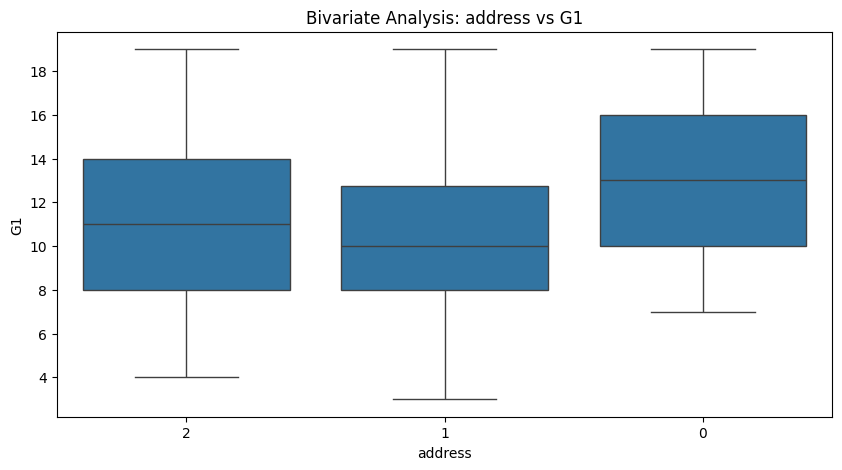

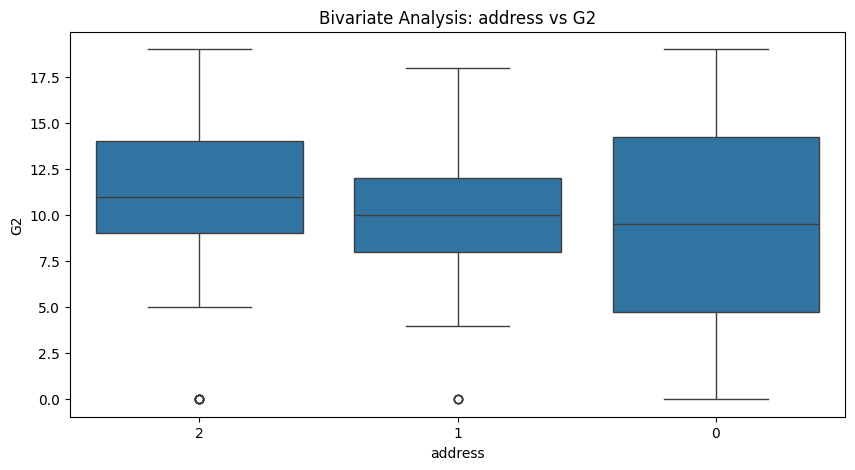

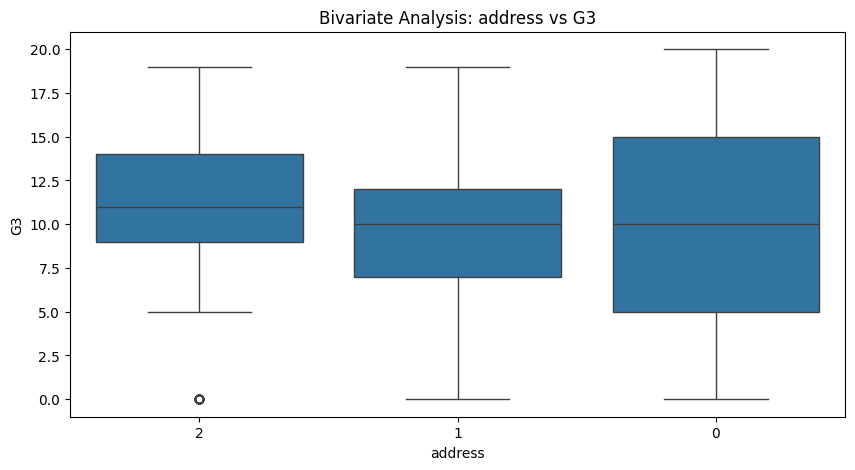

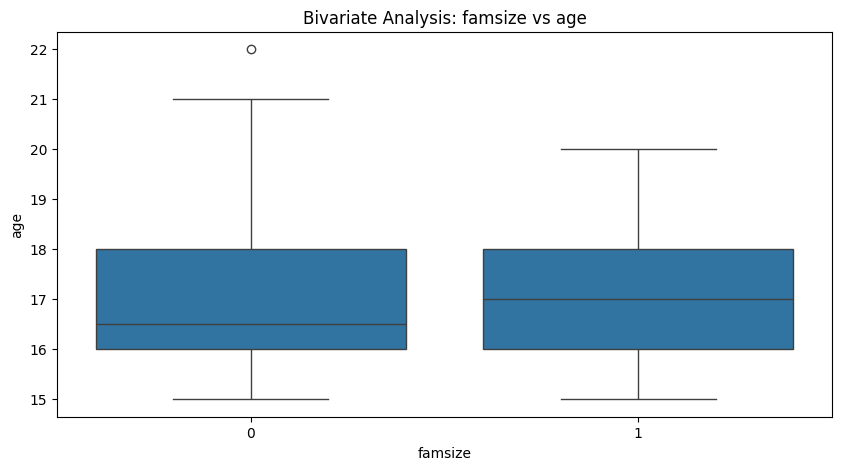

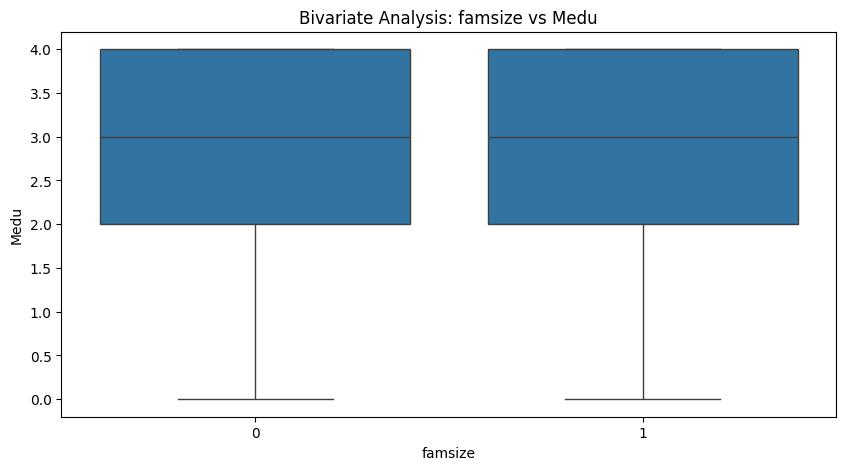

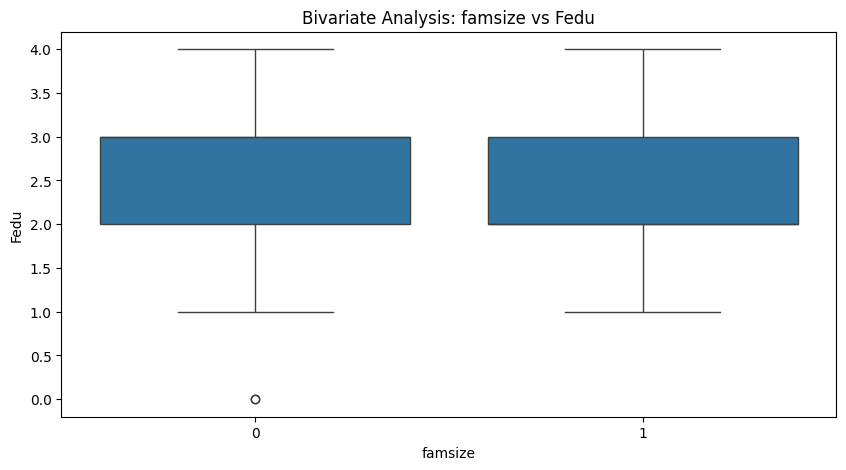

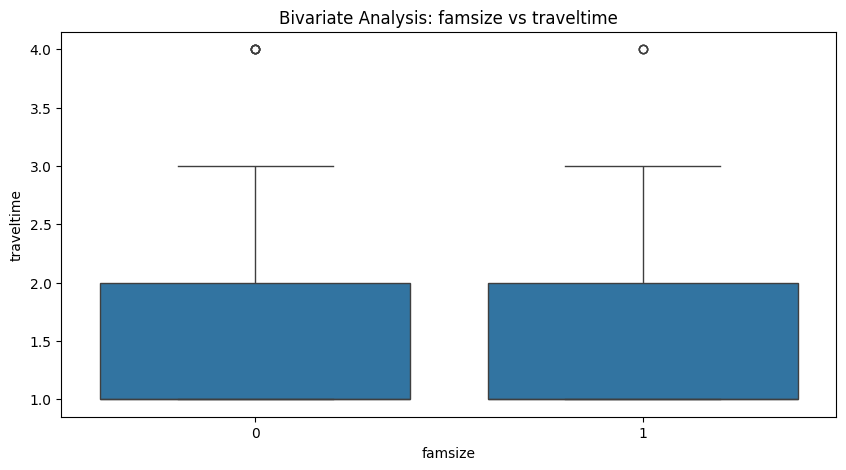

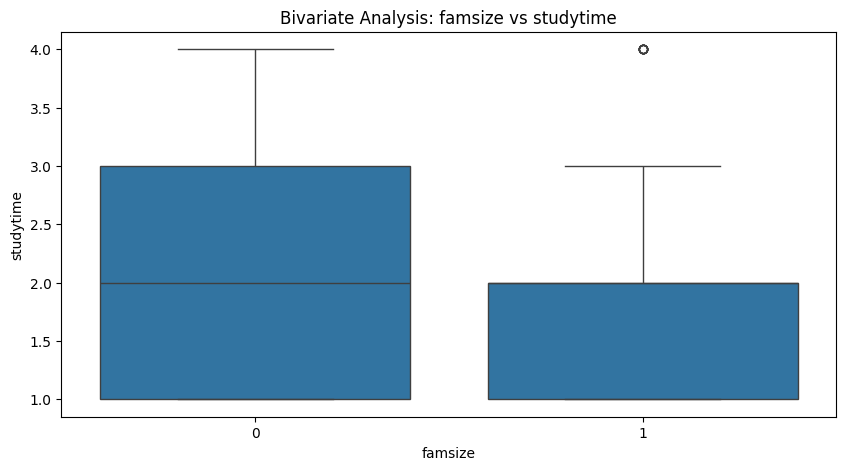

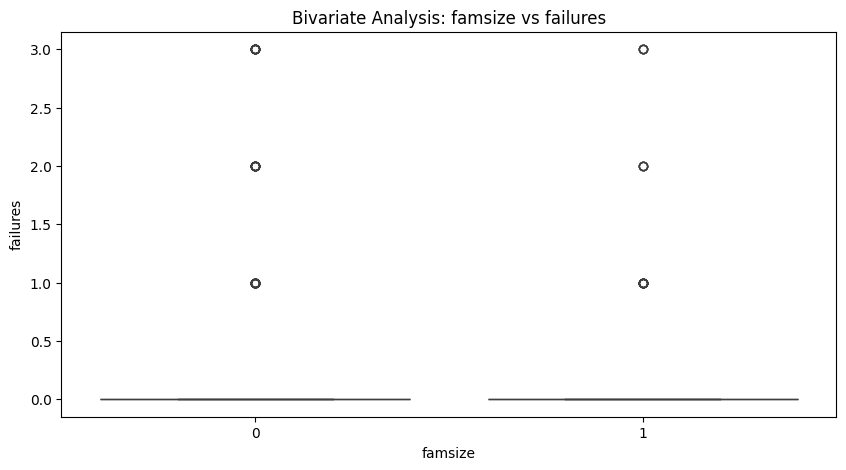

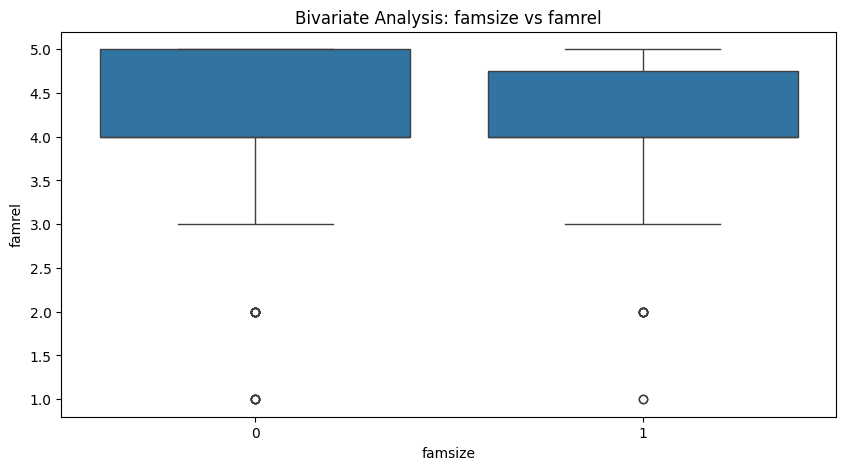

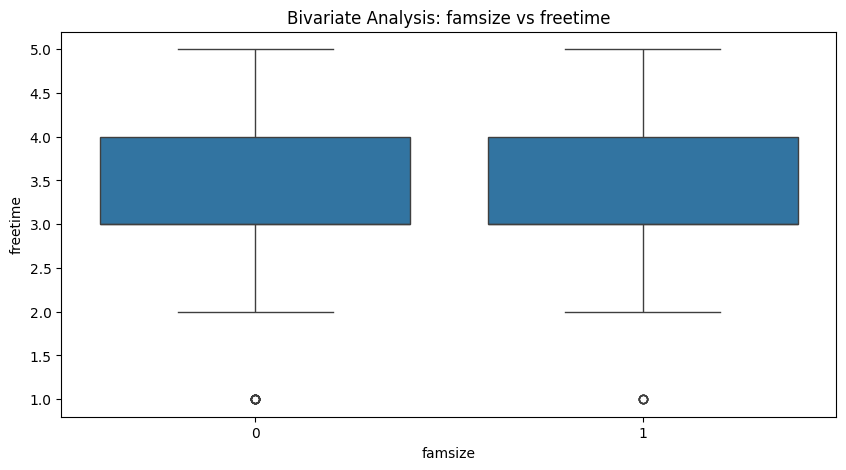

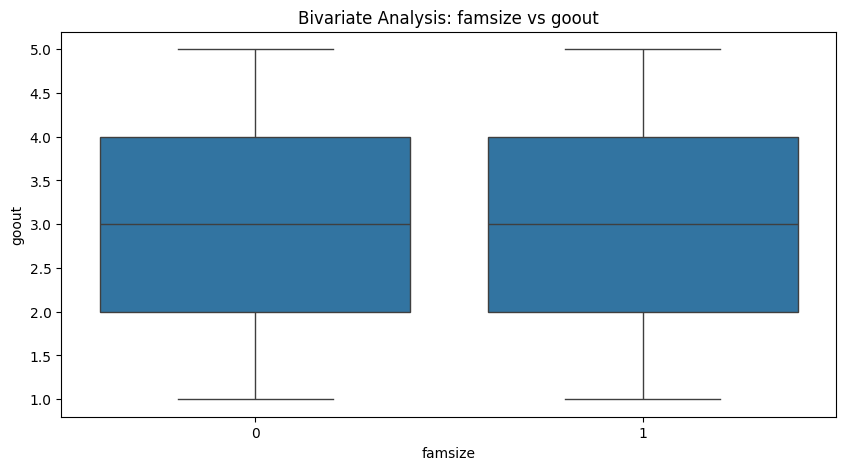

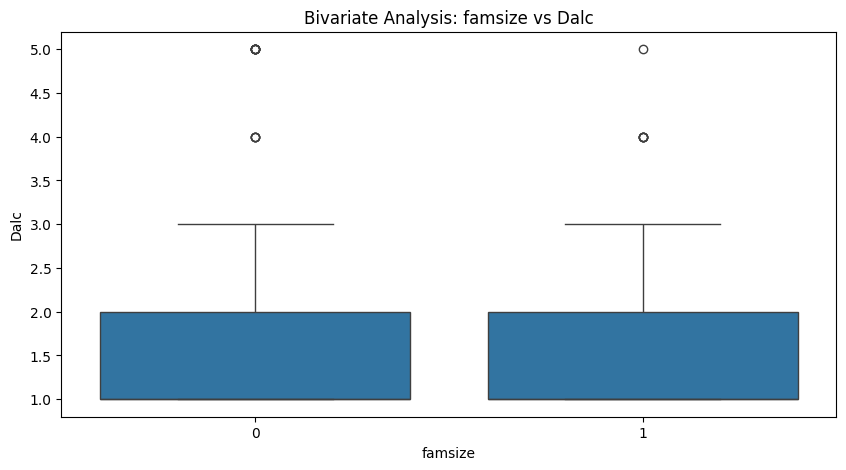

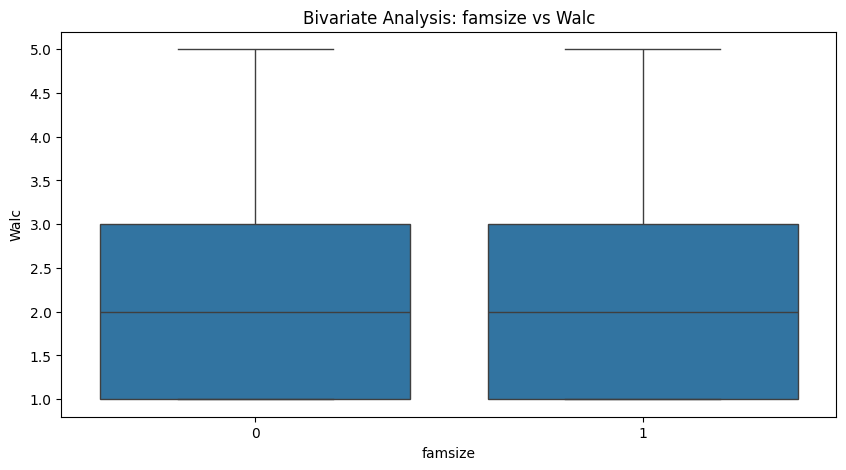

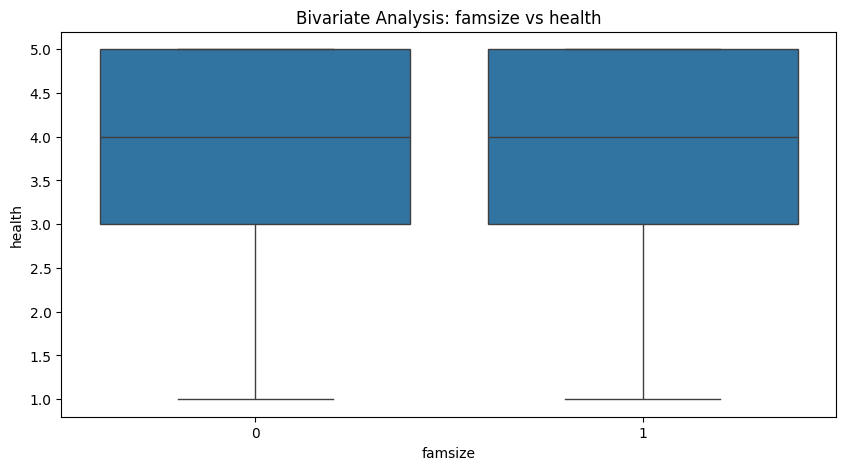

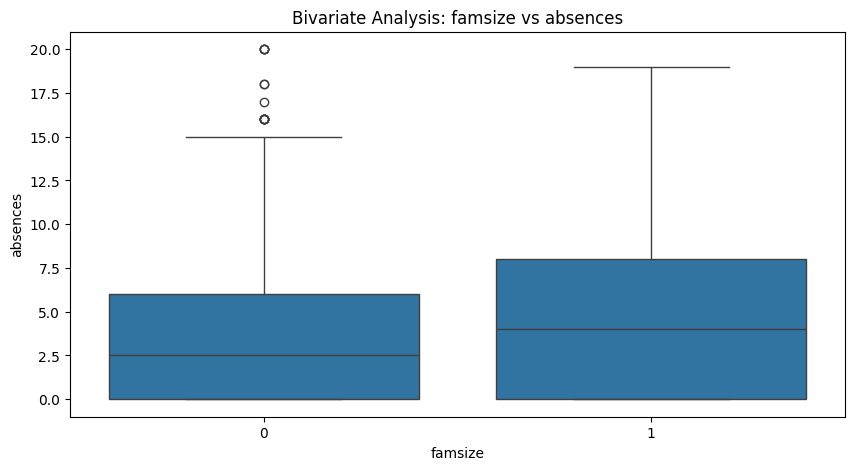

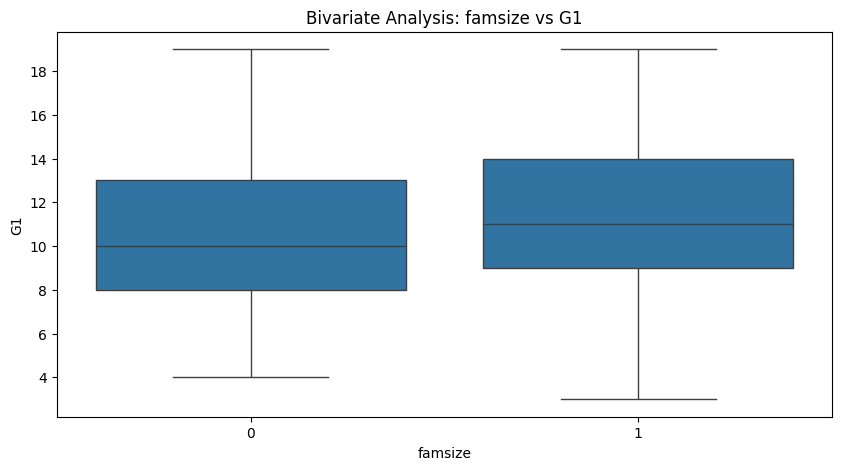

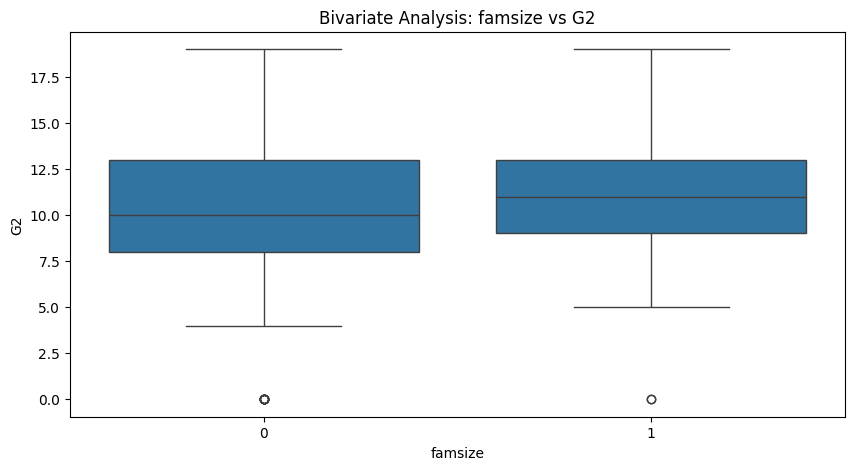

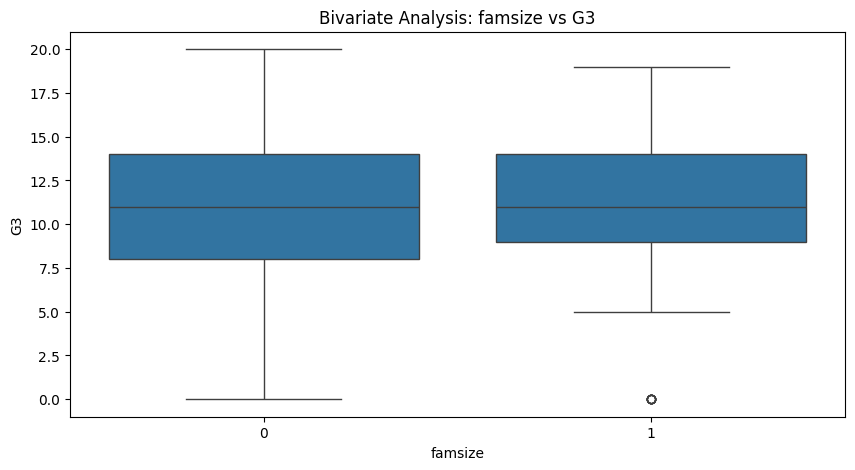

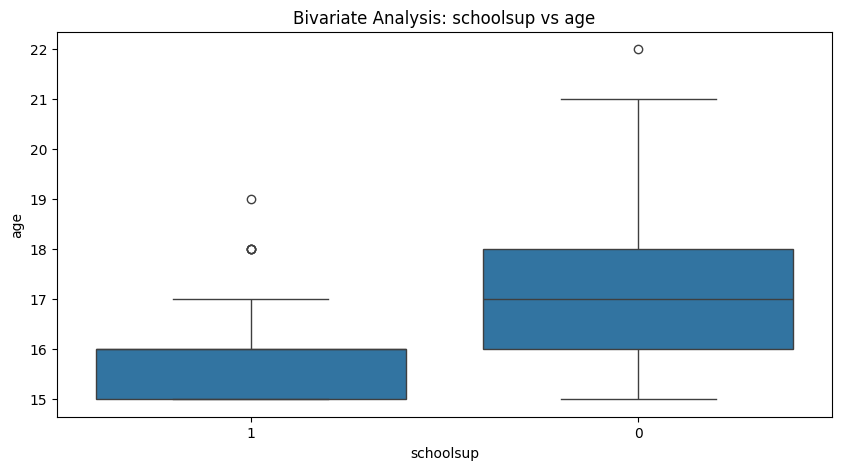

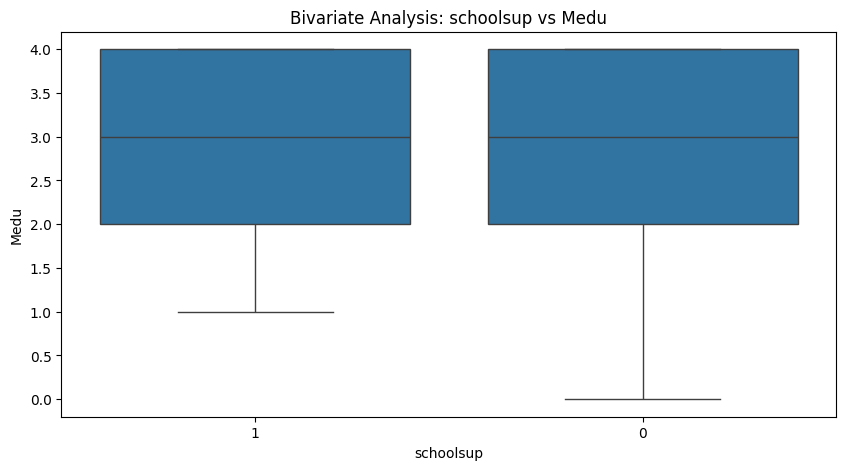

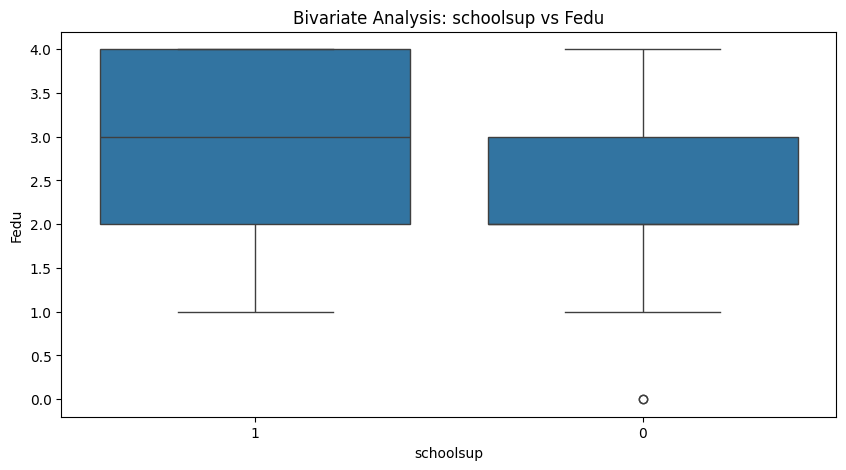

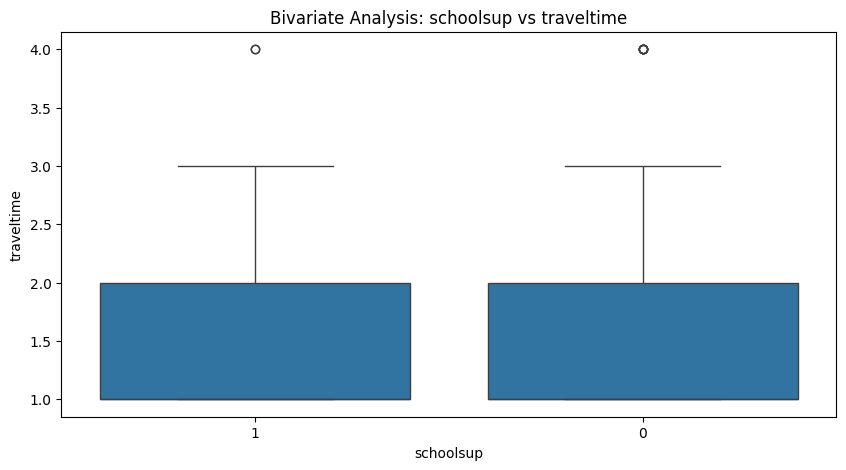

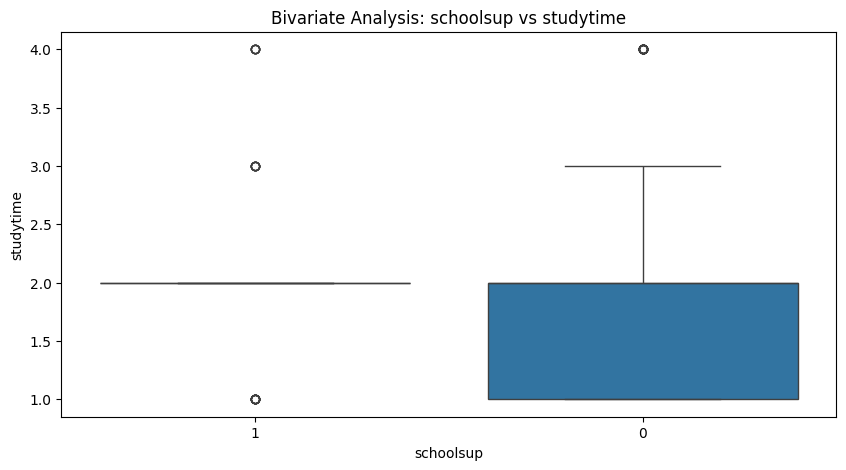

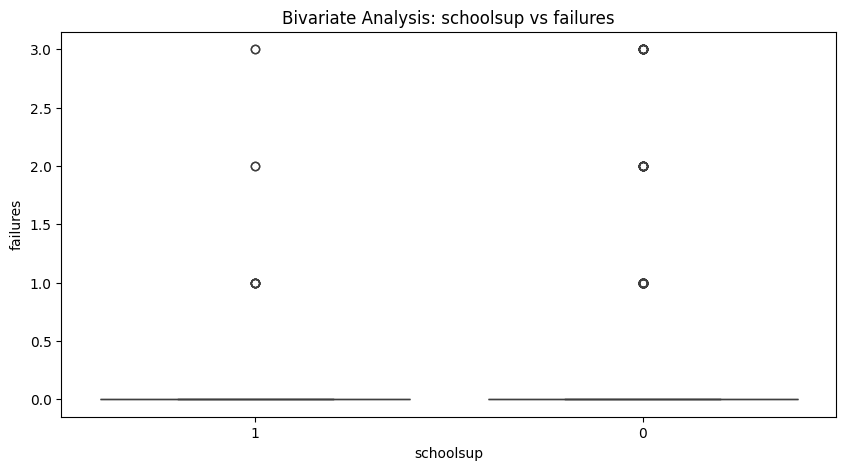

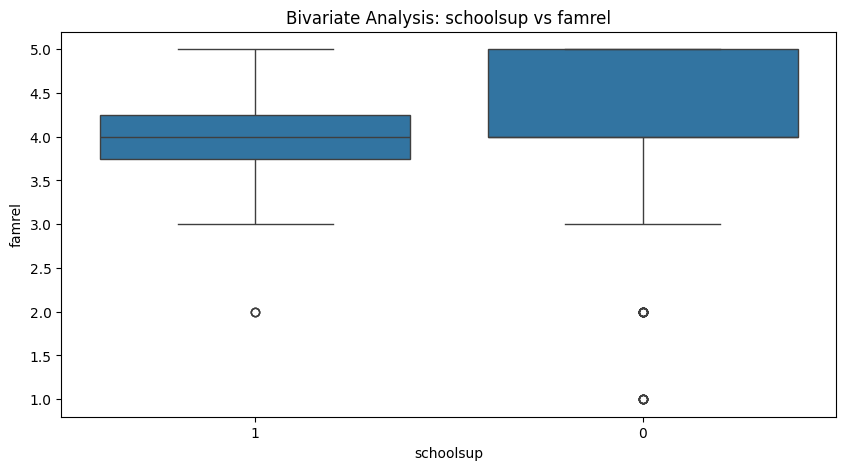

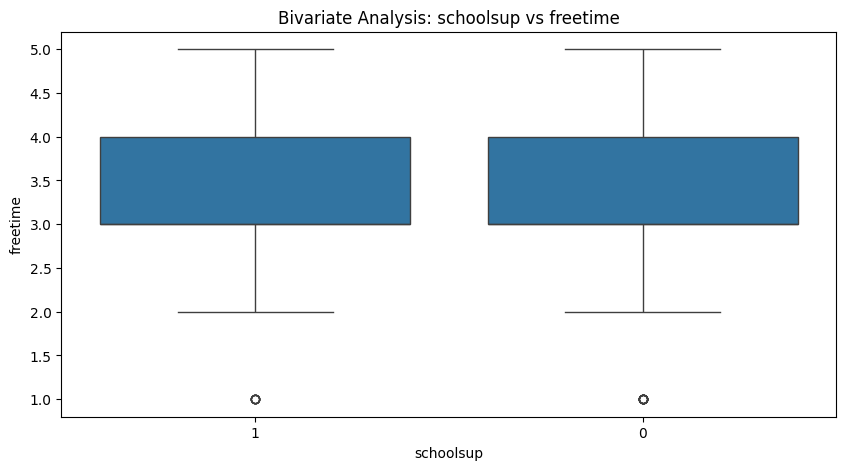

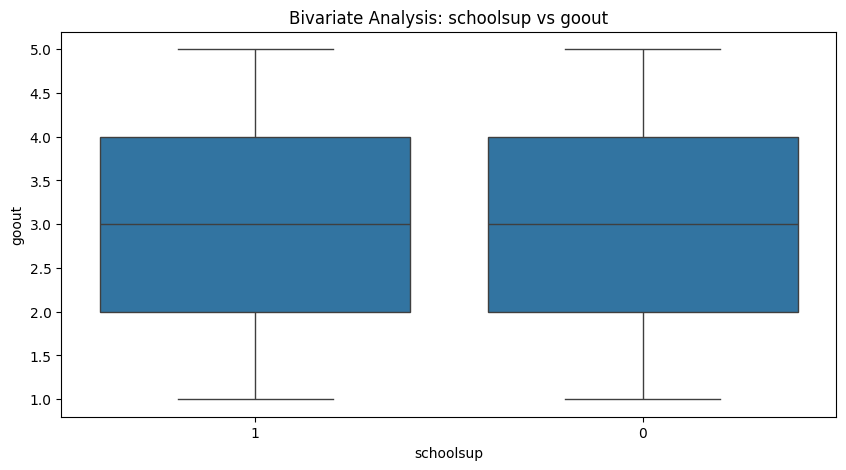

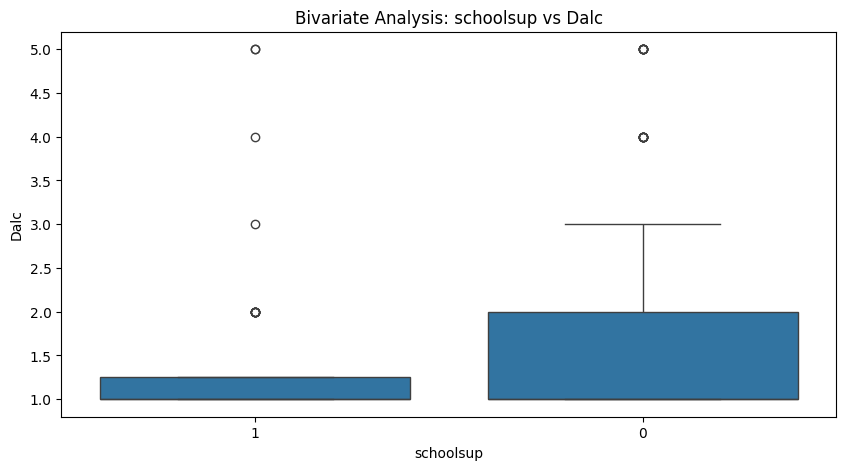

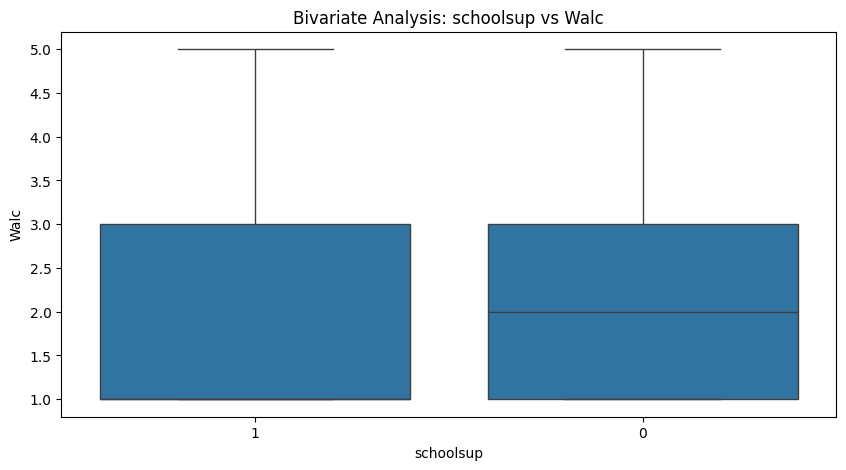

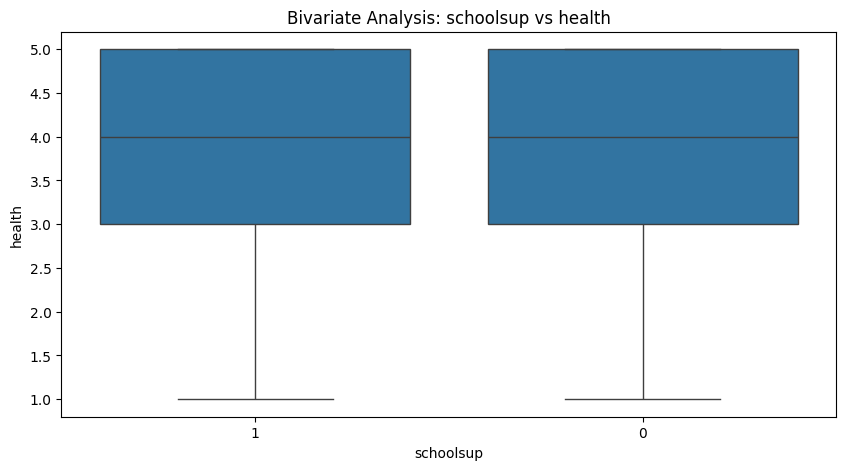

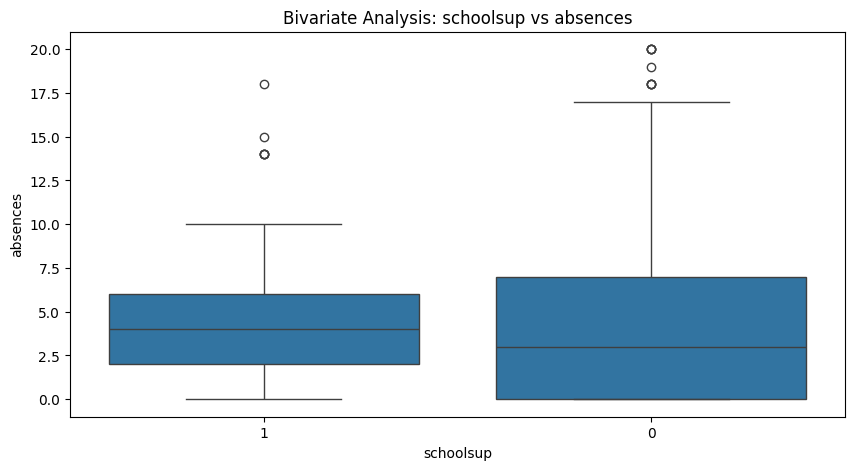

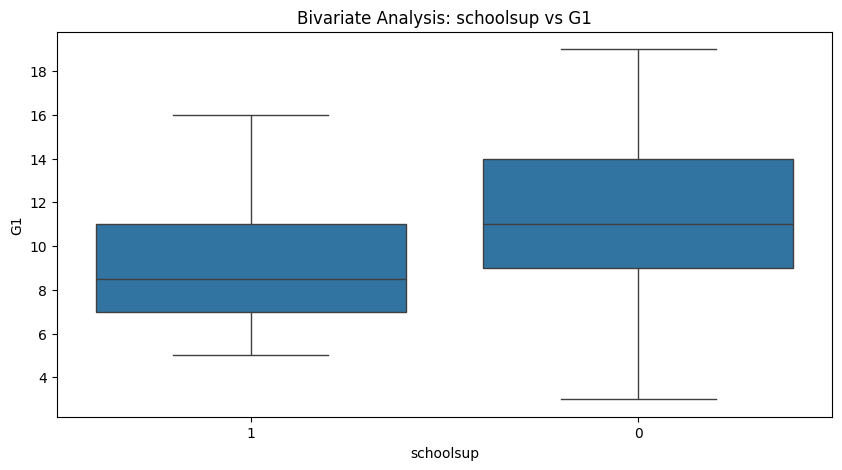

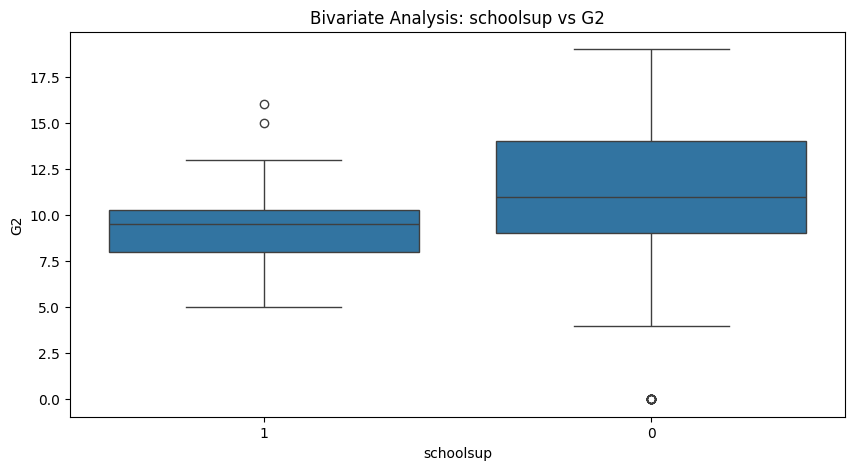

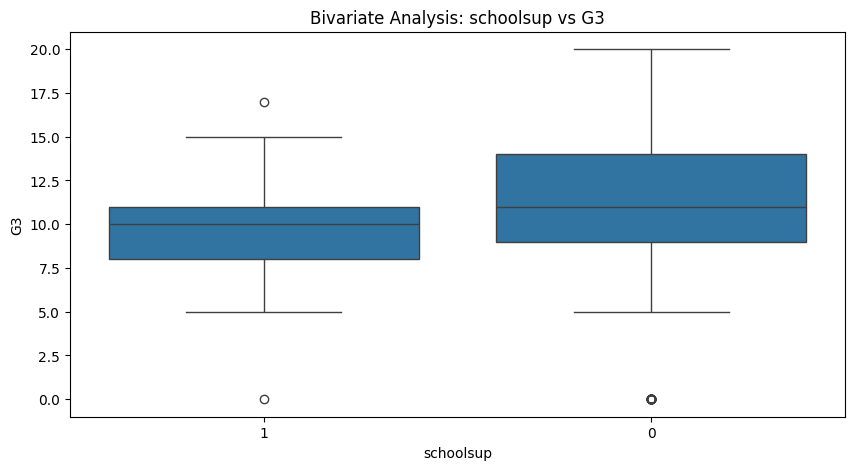

Column 'age_group' not found in DataFrame, skipping.


In [ ]:
categorical_cols = ['sex', 'address', 'famsize', 'schoolsup', 'age_group']
for cat_col in categorical_cols:
    if cat_col in df.columns:
        for num_col in df.select_dtypes(include=['float64', 'int64']).columns:
            plt.figure(figsize=(10,5))
            sns.boxplot(x=df[cat_col].astype(str), y=df[num_col])
            plt.title(f'Bivariate Analysis: {cat_col} vs {num_col}')
            plt.show()
    else:
        print(f"Column '{cat_col}' not found in DataFrame, skipping.")


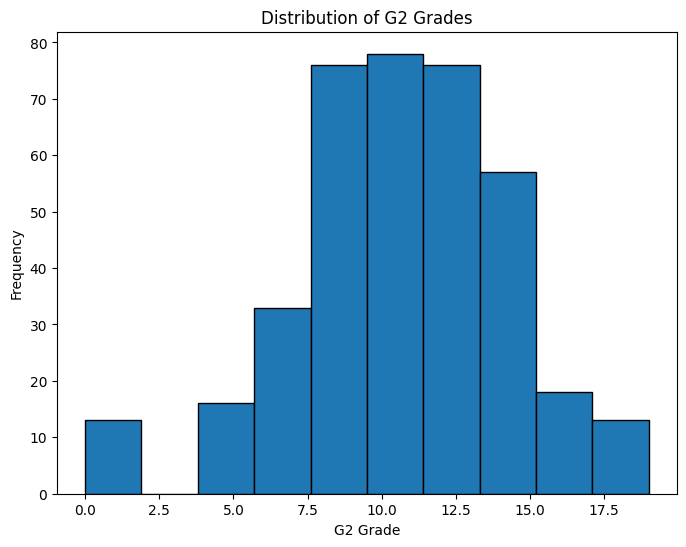

In [ ]:
# Histogram of G2 grades
plt.figure(figsize=(8, 6))
plt.hist(df['G2'], bins=10, edgecolor='black')
plt.title('Distribution of G2 Grades')
plt.xlabel('G2 Grade')
plt.ylabel('Frequency')
plt.show()


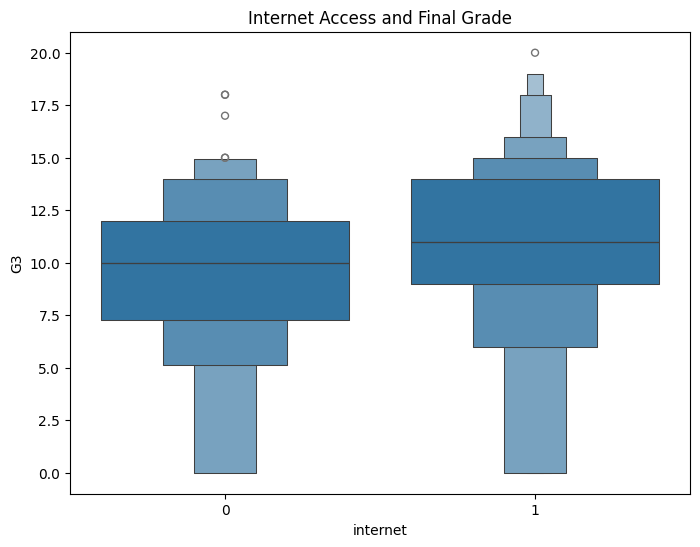

In [ ]:
# Relationship between internet access and final grade
plt.figure(figsize=(8, 6))
sns.boxenplot(x='internet', y='G3', data=df)  # Using boxenplot for better visualization of distributions
plt.title('Internet Access and Final Grade')
plt.show()


Multivariate Analysis

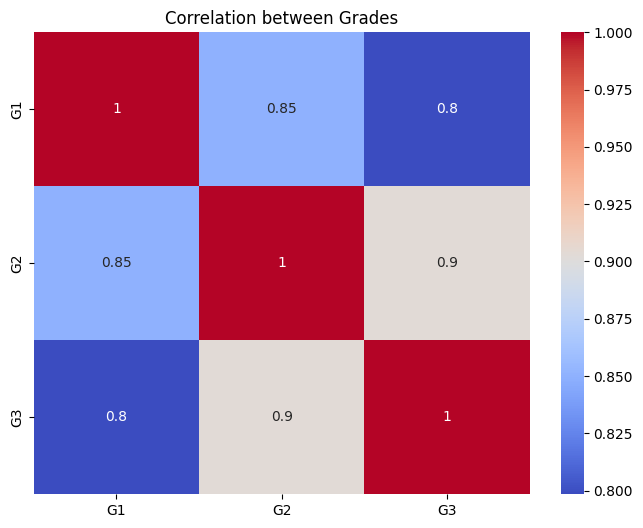

In [ ]:
# Heatmap of correlations between grades
plt.figure(figsize=(8, 6))
sns.heatmap(df[['G1', 'G2', 'G3']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Grades')
plt.show()


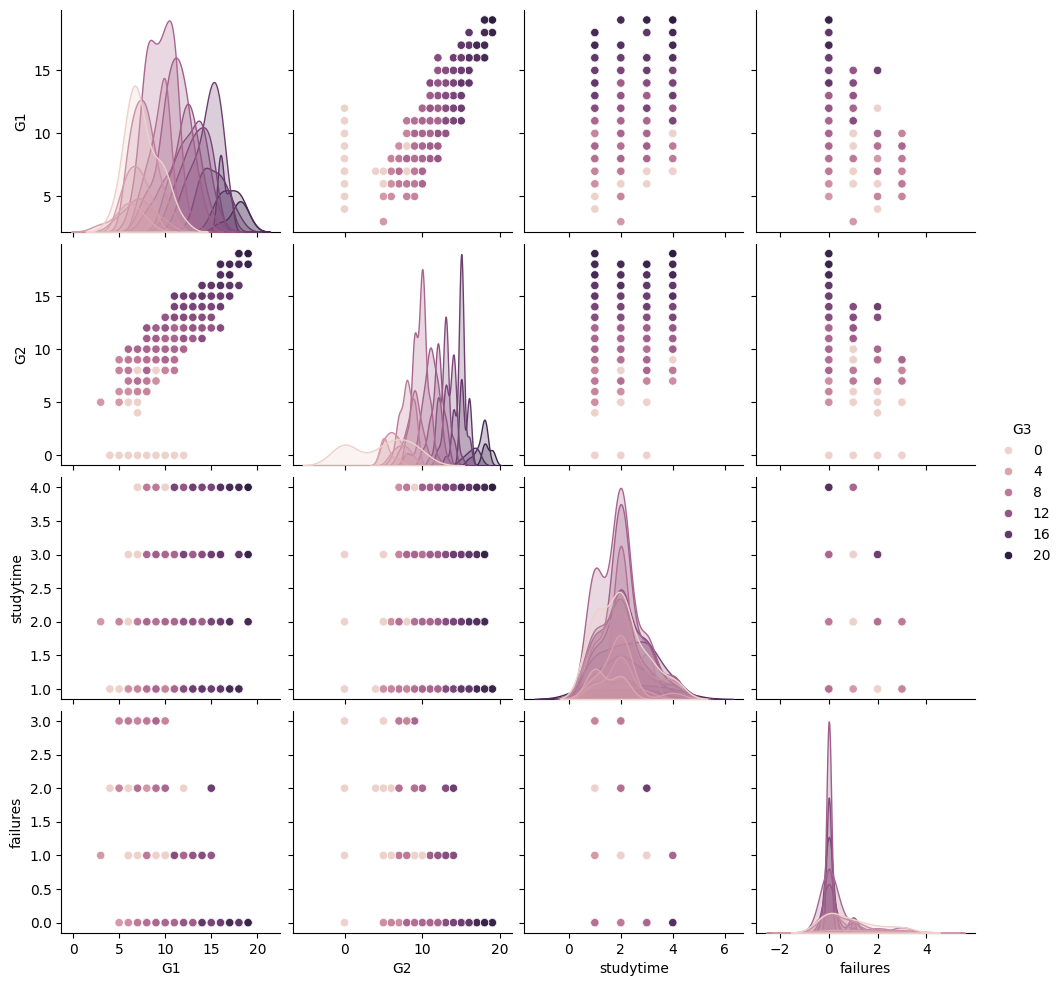

In [ ]:
# Pairplot of relevant features
sns.pairplot(df[['G1', 'G2', 'G3', 'studytime', 'failures']], hue='G3')
plt.show()

<Figure size 1200x600 with 0 Axes>

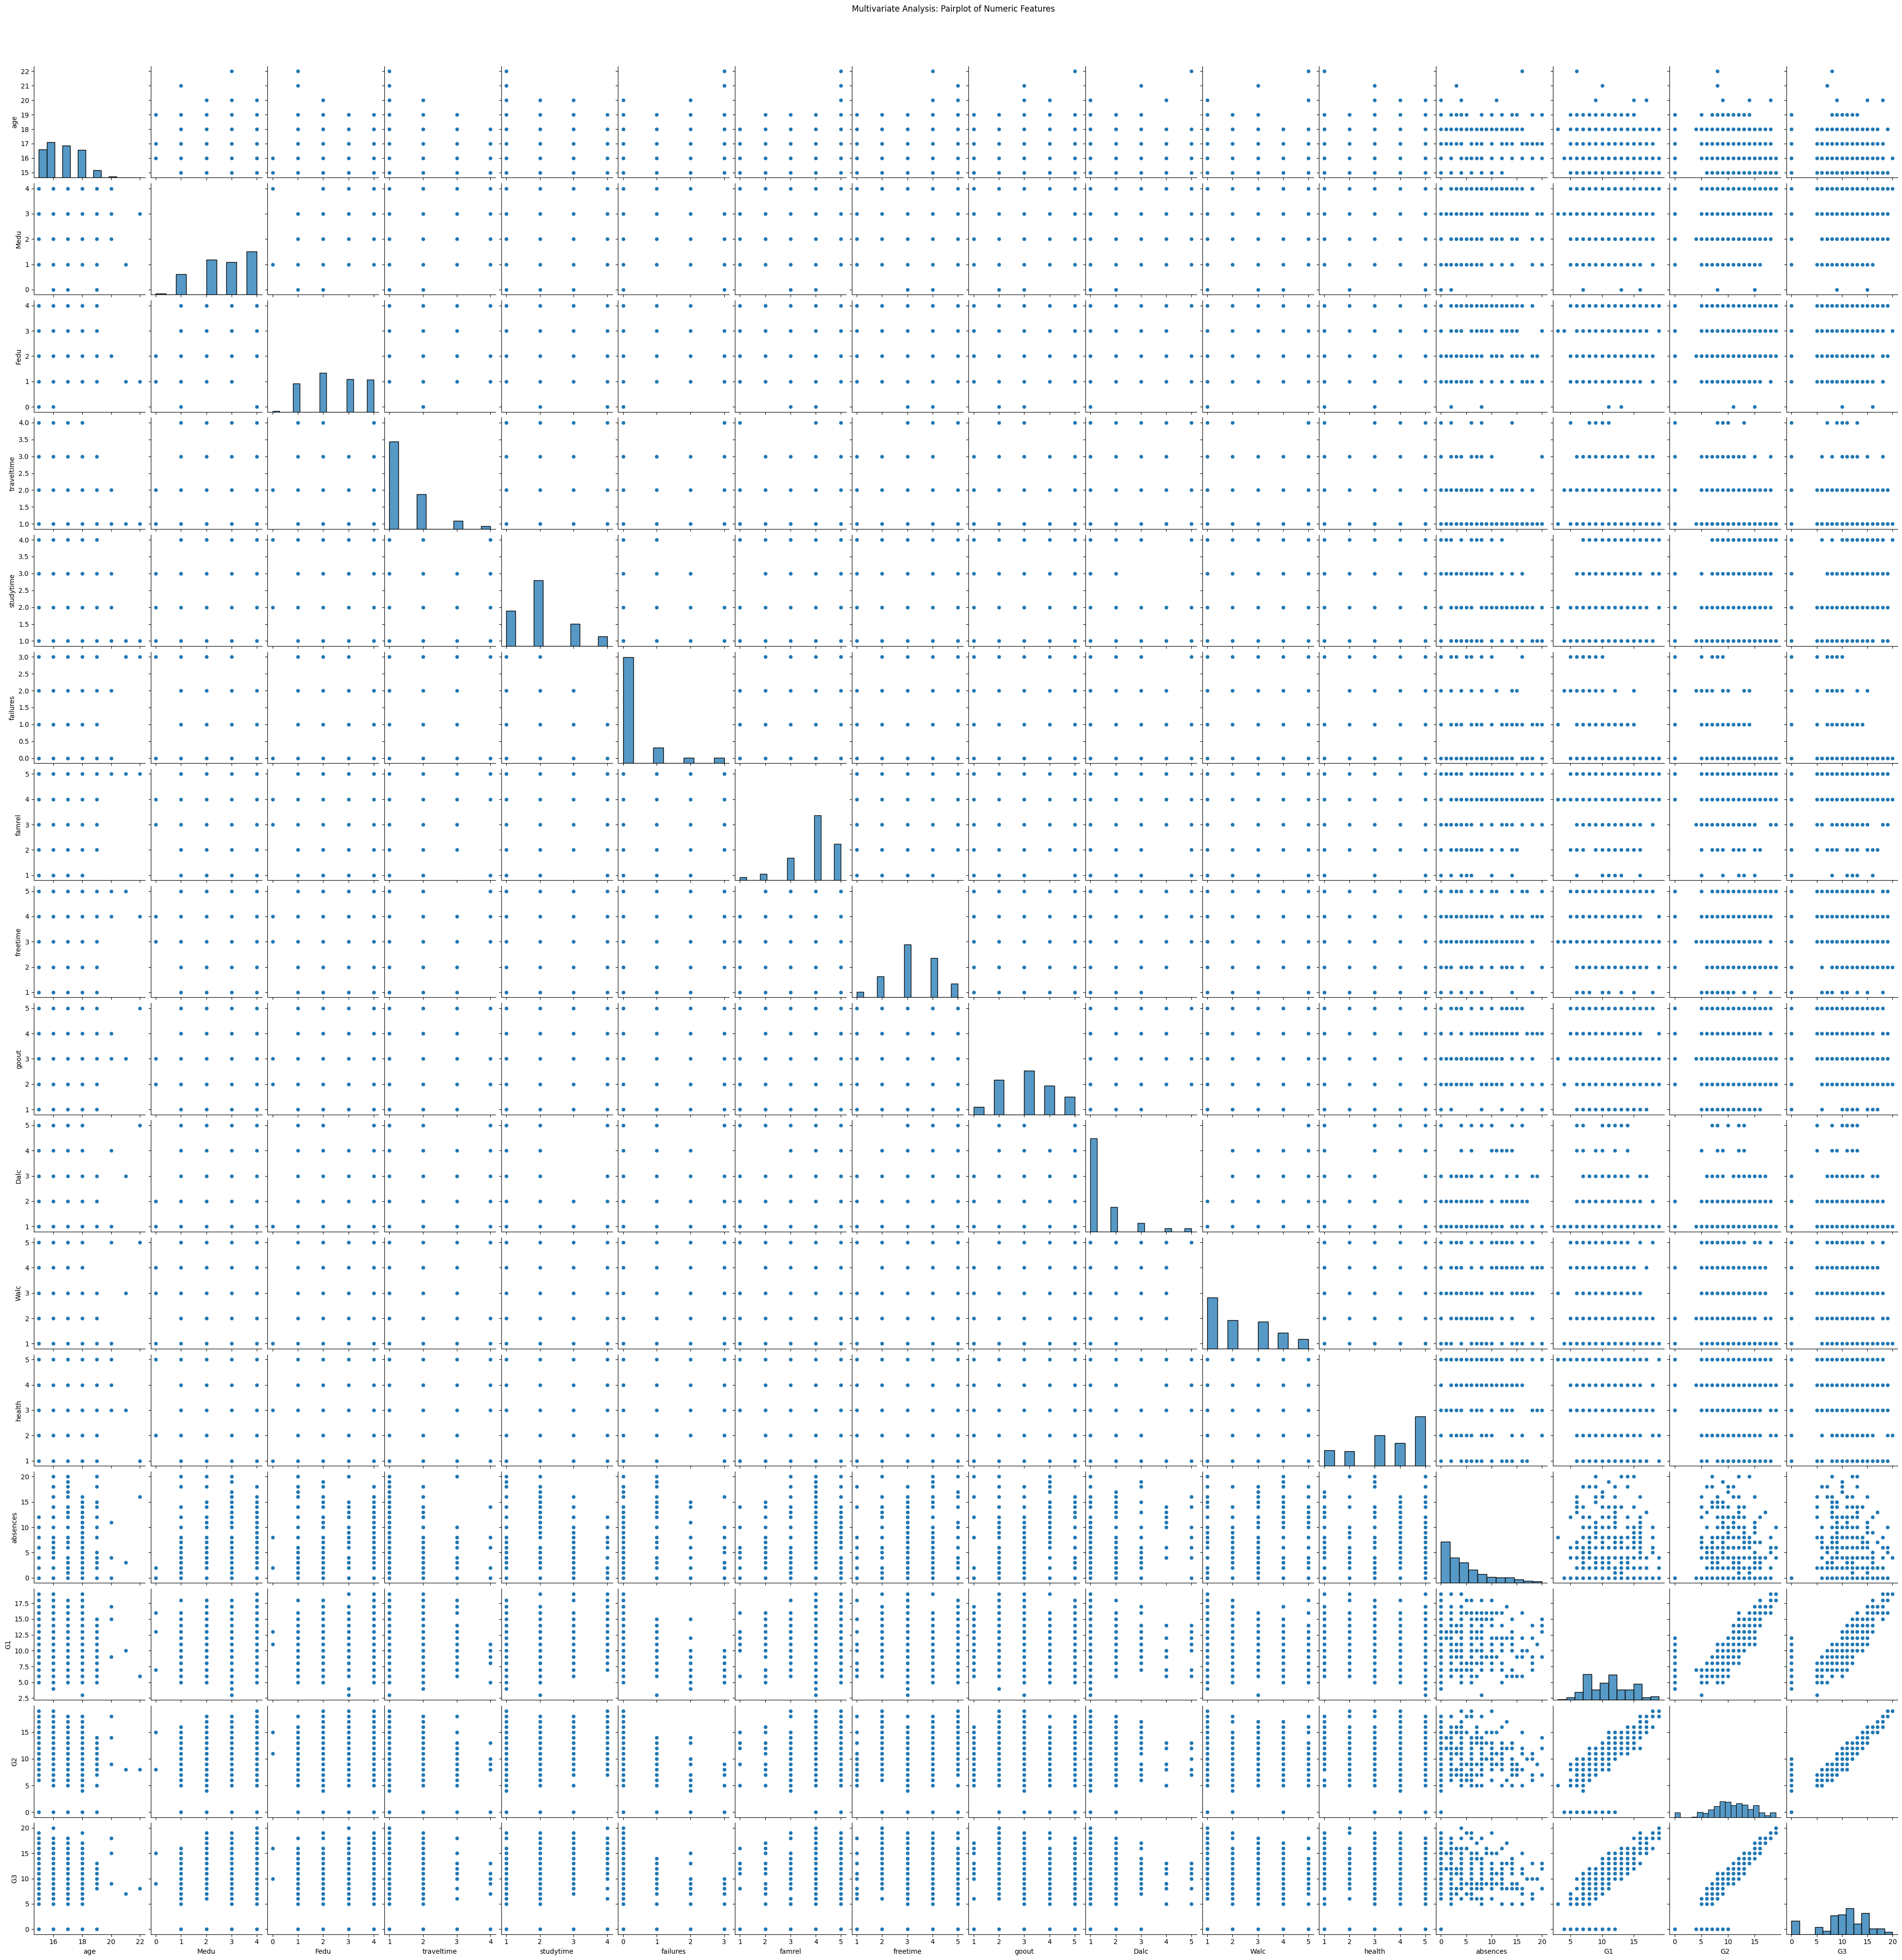

In [ ]:
# Multivariate Analysis
plt.figure(figsize=(12,6))
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Multivariate Analysis: Pairplot of Numeric Features', y=1.02)
plt.show()

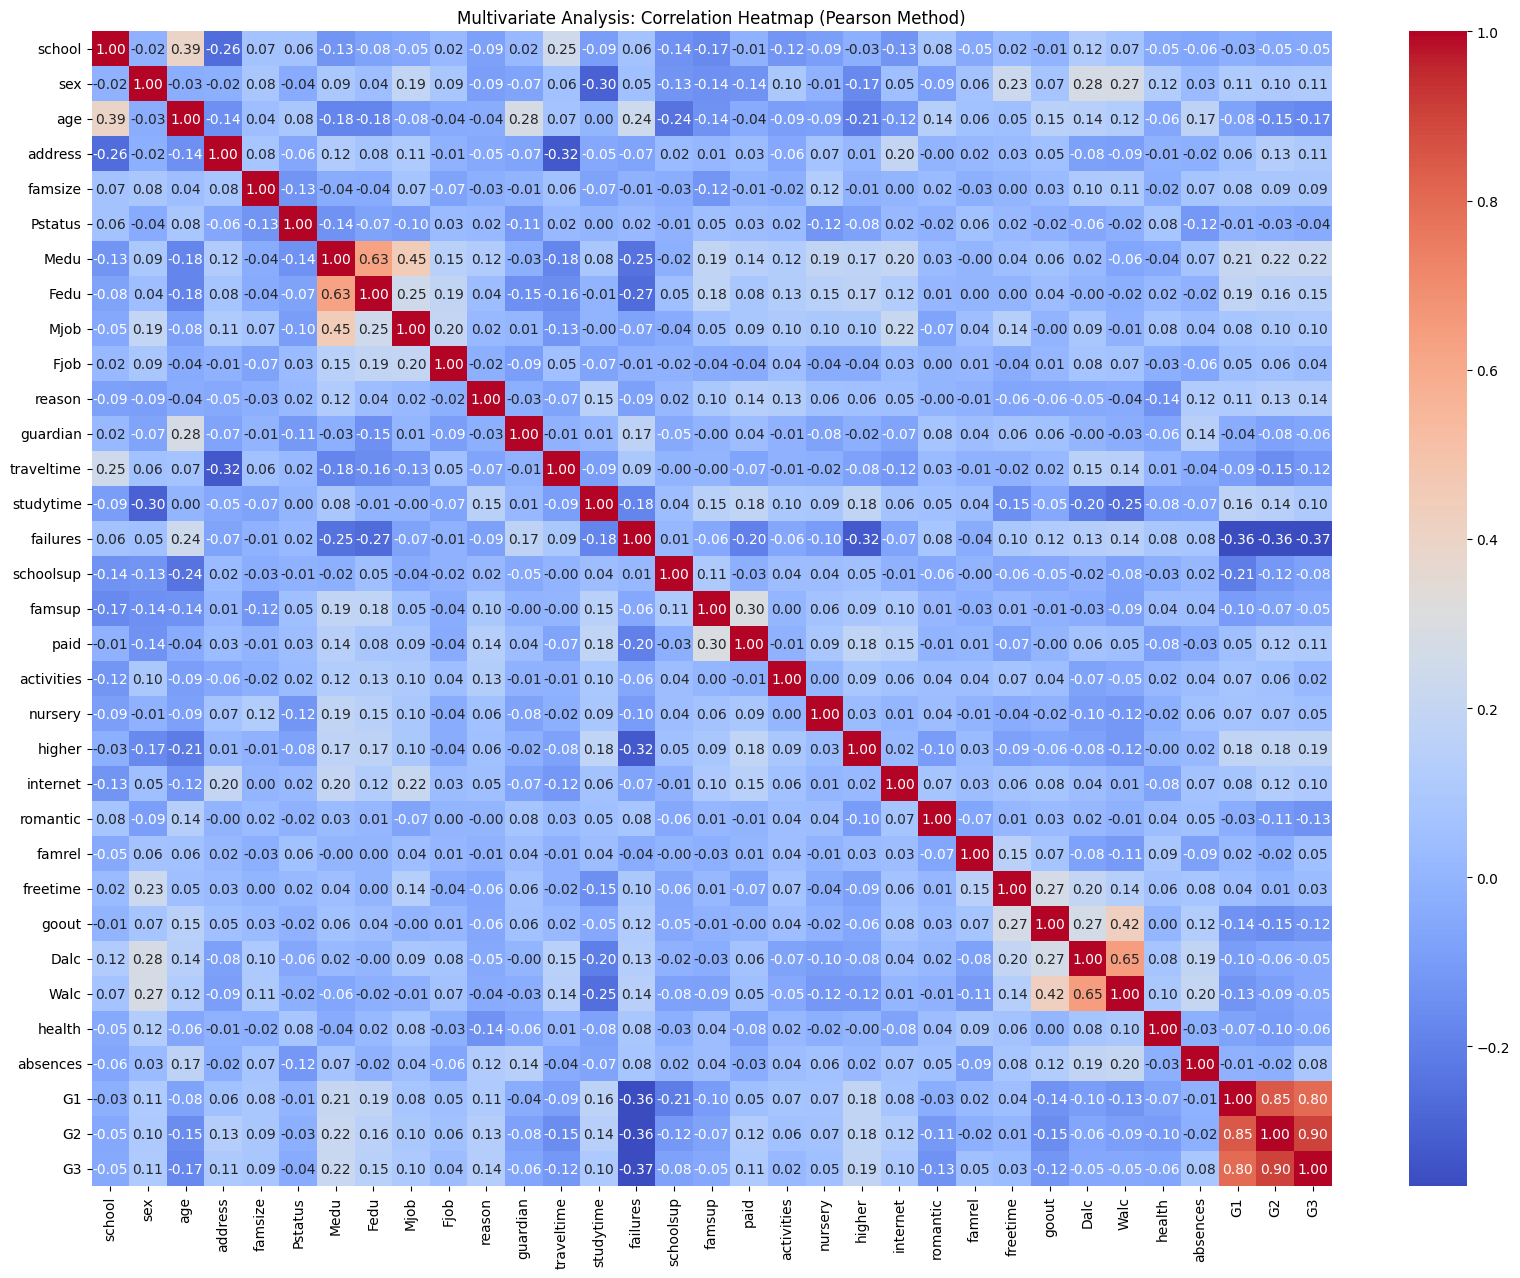

In [ ]:
#Correlation Matrix with Heatmap using Pearson method
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Multivariate Analysis: Correlation Heatmap (Pearson Method)')
plt.show()

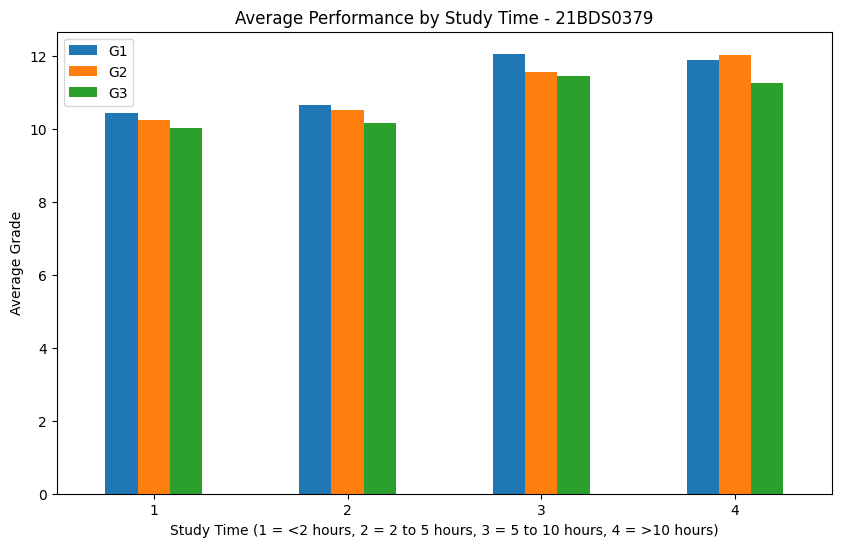

In [ ]:
# Bar Plot - Average Performance (G1, G2, G3) by Study Time
data = pd.read_csv('MyDataset_EDA.csv')
study_time_avg_performance = df.groupby('studytime')[['G1', 'G2', 'G3']].mean()

study_time_avg_performance.plot(kind='bar', figsize=(10,6))
plt.title("Average Performance by Study Time - 21BDS0379")
plt.xlabel("Study Time (1 = <2 hours, 2 = 2 to 5 hours, 3 = 5 to 10 hours, 4 = >10 hours)")
plt.ylabel("Average Grade")
plt.xticks(rotation=0)
plt.show()

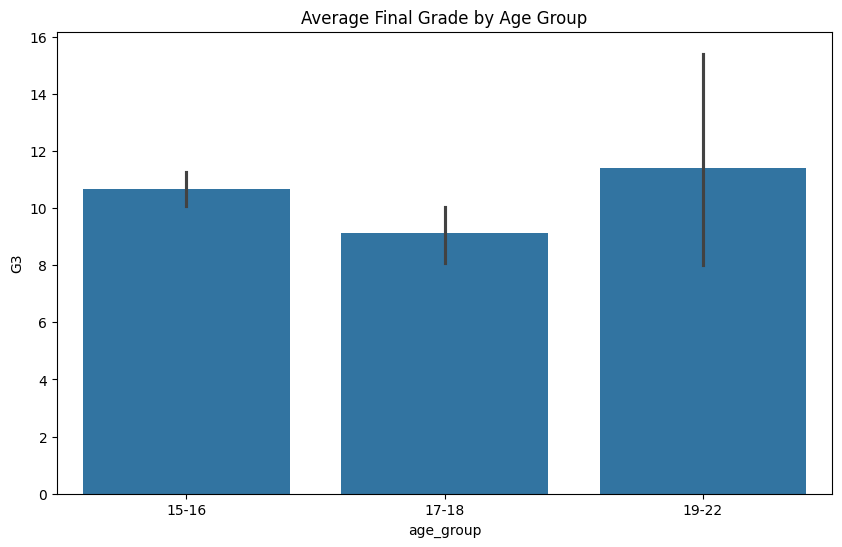

In [ ]:
# Bar plot of average G3 by age group
df['age_group'] = pd.cut(df['age'], bins=[15, 17, 19, 22], labels=['15-16', '17-18', '19-22'])
plt.figure(figsize=(10,6))
sns.barplot(x='age_group', y='G3', data=df)
plt.title('Average Final Grade by Age Group')
plt.show()


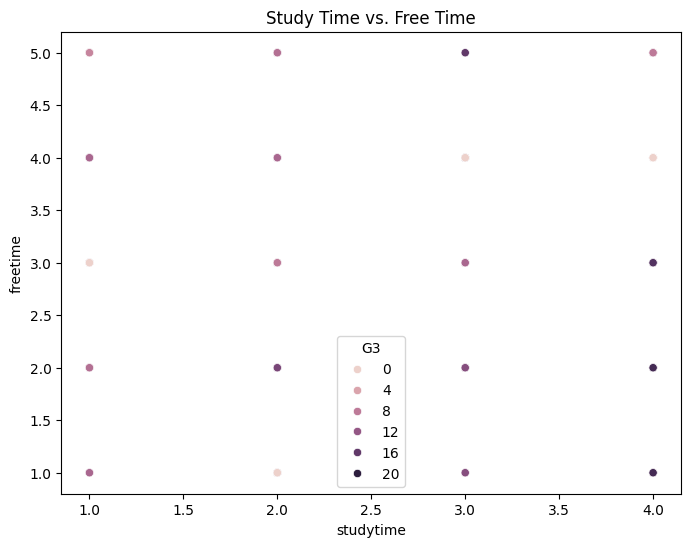

In [ ]:
# Scatter plot of study time vs free time
plt.figure(figsize=(8, 6))
sns.scatterplot(x='studytime', y='freetime', data=df, hue='G3')
plt.title('Study Time vs. Free Time')
plt.show()

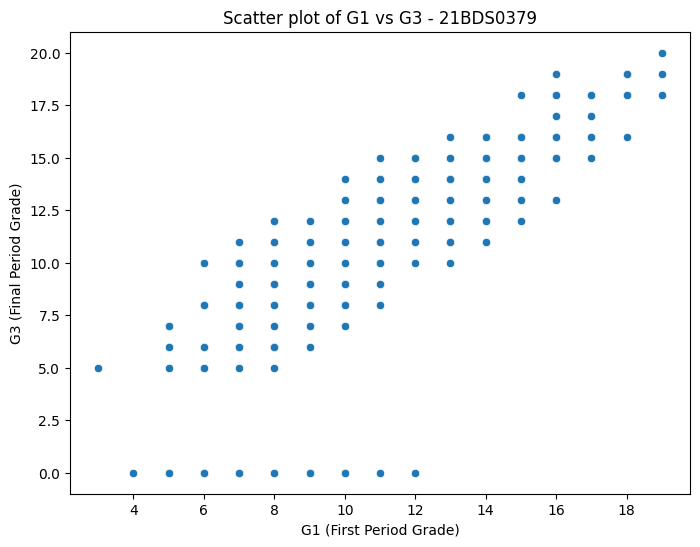

In [ ]:
# Scatter Plot - G1 vs G3
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['G1'], y=df['G3'])
plt.title("Scatter plot of G1 vs G3 - 21BDS0379")
plt.xlabel("G1 (First Period Grade)")
plt.ylabel("G3 (Final Period Grade)")
plt.show()

#PHASE 2

MODULE 4

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Statistical summary measures for the numerical data
stat_summary = df.describe()
print("Statistical Summary Measures:")
print(stat_summary)

# Data elaboration - Checking the data types and null values
data_info = data.info()
null_values = data.isnull().sum()

print("\nData Information:")
print(data_info)
print("\nMissing Values Count:")
print(null_values)

Statistical Summary Measures:
           school         sex         age     address     famsize     Pstatus  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  380.000000   
mean     0.121053    0.478947   16.671053    1.763158    0.289474    1.868421   
std      0.326618    0.500215    1.274762    0.437926    0.454116    0.382400   
min      0.000000    0.000000   15.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   16.000000    2.000000    0.000000    2.000000   
50%      0.000000    0.000000   17.000000    2.000000    0.000000    2.000000   
75%      0.000000    1.000000   18.000000    2.000000    1.000000    2.000000   
max      1.000000    1.000000   22.000000    2.000000    1.000000    2.000000   

             Medu        Fedu        Mjob        Fjob  ...      famrel  \
count  380.000000  380.000000  380.000000  380.000000  ...  380.000000   
mean     2.726316    2.507895    2.155263    2.271053  ...    3.947368   
std      1.101135 

In [ ]:
# 1-D Statistical Data Analysis: Distribution of 'age'
age_stats = df['age'].describe()
print("\n1-D Statistical Data Analysis (Age):")
print(age_stats)


1-D Statistical Data Analysis (Age):
count    380.000000
mean      16.671053
std        1.274762
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64


In [ ]:
# 2-D Statistical Data Analysis: Correlation matrix for numerical variables
numeric_data = data.select_dtypes(include=['int64', 'float64'])  # Selecting only numeric columns
correlation_matrix = numeric_data.corr()
print("\n2-D Statistical Data Analysis (Correlation Matrix):")
print(correlation_matrix)


2-D Statistical Data Analysis (Correlation Matrix):
                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.163658 -0.163438    0.070641  -0.004140  0.243665   
Medu       -0.163658  1.000000  0.623455   -0.171639   0.064944 -0.236680   
Fedu       -0.163438  0.623455  1.000000   -0.158194  -0.009175 -0.250408   
traveltime  0.070641 -0.171639 -0.158194    1.000000  -0.100909  0.092239   
studytime  -0.004140  0.064944 -0.009175   -0.100909   1.000000 -0.173563   
failures    0.243665 -0.236680 -0.250408    0.092239  -0.173563  1.000000   
famrel      0.053940 -0.003914 -0.001370   -0.016808   0.039731 -0.044337   
freetime    0.016434  0.030891 -0.012846   -0.017025  -0.143198  0.091987   
goout       0.126964  0.064094  0.043105    0.028540  -0.063904  0.124561   
Dalc        0.131125  0.019834  0.002386    0.138325  -0.196019  0.136047   
Walc        0.117276 -0.047123 -0.012631    0.134116  -0.253785  0.141962   
health     -0.062187 -0

In [ ]:
# Contingency tables for categorical variables
contingency_sex_address = pd.crosstab(data['sex'], data['address'])
contingency_sex_famsize = pd.crosstab(data['sex'], data['famsize'])

print("\nContingency Table - Sex vs Address:")
print(contingency_sex_address)
print("\nContingency Table - Sex vs Famsize:")
print(contingency_sex_famsize)


Contingency Table - Sex vs Address:
address  ?   R    U
sex                
F        1  44  162
M        1  43  141

Contingency Table - Sex vs Famsize:
famsize  GT3  LE3
sex              
F        156   52
M        123   61


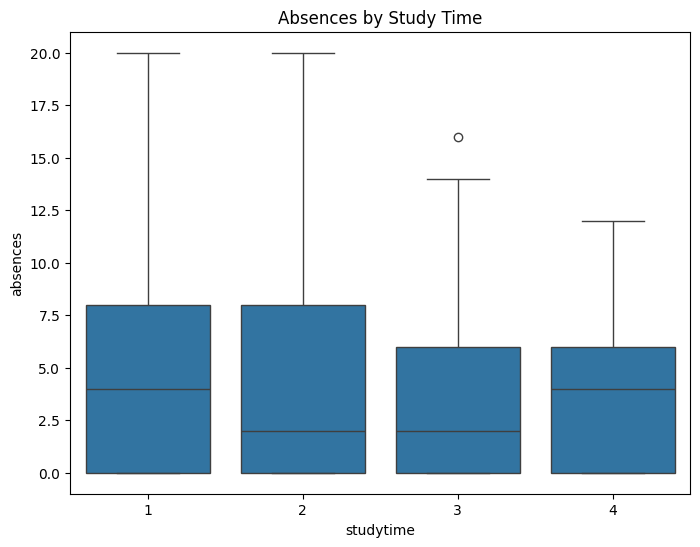

In [ ]:
# Box plot of absences by study time
plt.figure(figsize=(8, 6))
sns.boxplot(x='studytime', y='absences', data=df)
plt.title('Absences by Study Time')
plt.show()


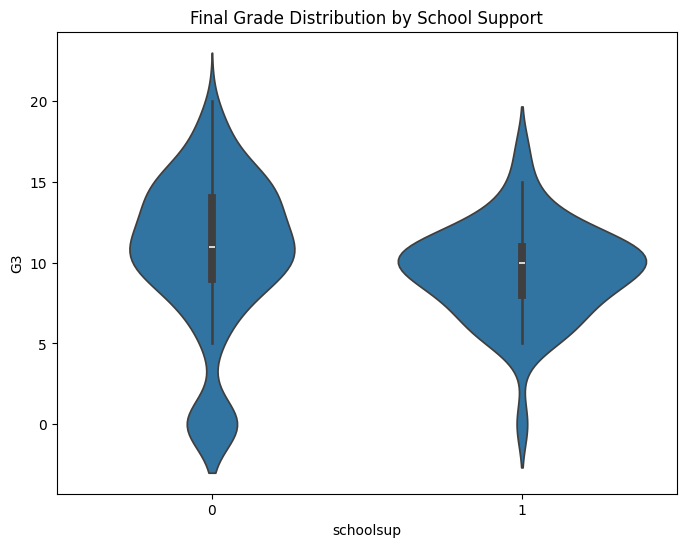

In [ ]:
# Violin plot of final grade (G3) by school support
plt.figure(figsize=(8, 6))
sns.violinplot(x='schoolsup', y='G3', data=df)
plt.title('Final Grade Distribution by School Support')
plt.show()

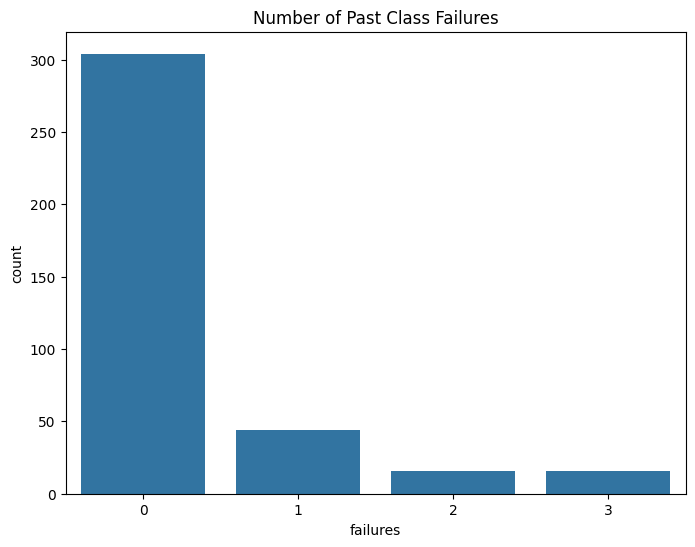

In [ ]:
# Count plot of failures
plt.figure(figsize=(8, 6))
sns.countplot(x='failures', data=df)
plt.title('Number of Past Class Failures')
plt.show()

Module 5

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import kneighbors_graph

In [ ]:
# Load dataset
data = pd.read_csv('MyDataset_EDA.csv')

# Preprocessing: Extracting numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

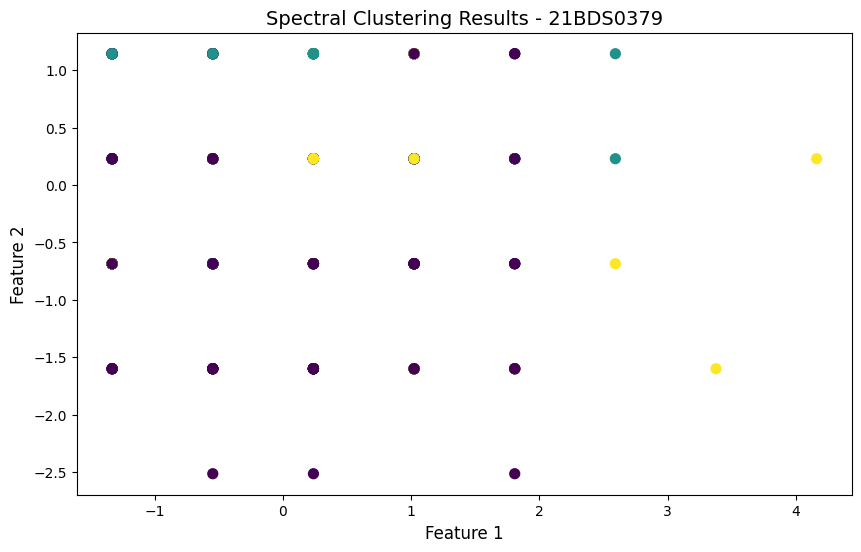

In [ ]:
# Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
labels_spectral = spectral.fit_predict(scaled_data)

# Plot Spectral Clustering Results
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_spectral, cmap='viridis', s=50)
plt.title("Spectral Clustering Results - 21BDS0379", fontsize=14)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.show()

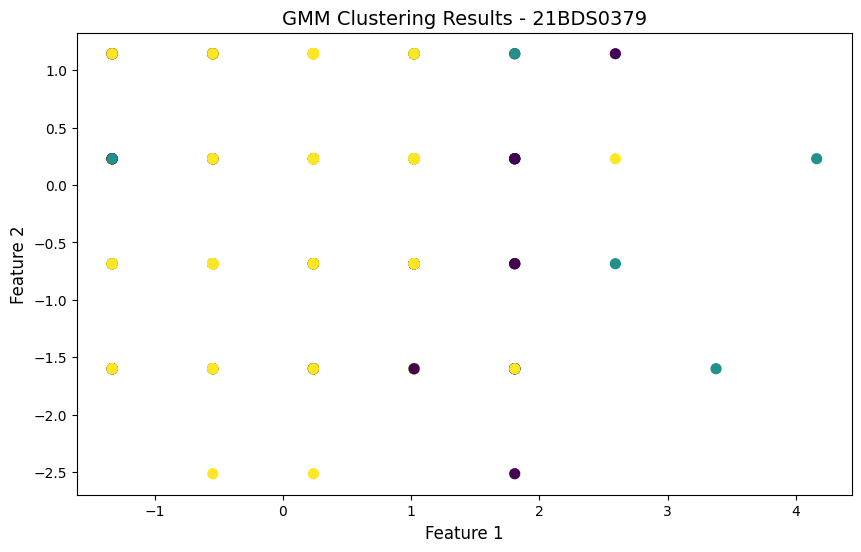

In [ ]:
# Model-based Clustering using Expectation-Maximization (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=3, random_state=42)
labels_gmm = gmm.fit_predict(scaled_data)

# Plot GMM Clustering Results
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_gmm, cmap='viridis', s=50)
plt.title("GMM Clustering Results - 21BDS0379", fontsize=14)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.show()

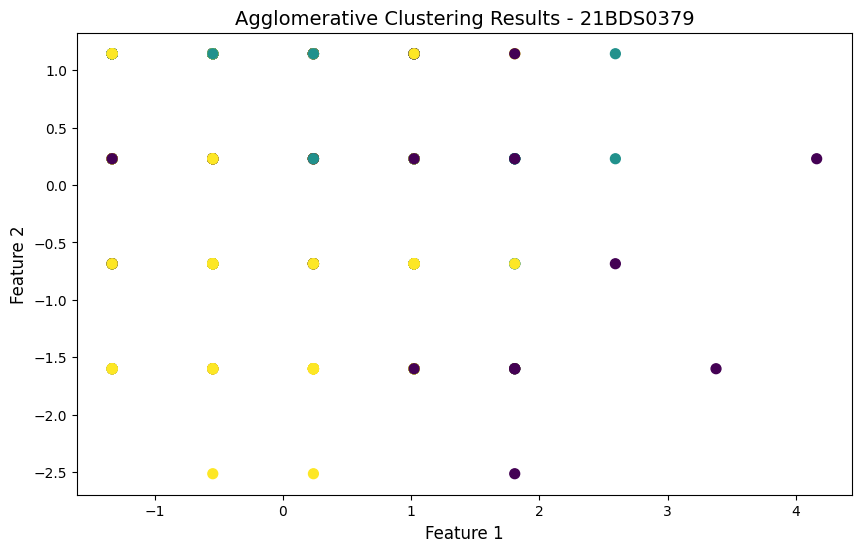

In [ ]:
# Hierarchical Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3)
labels_agg = agg_clust.fit_predict(scaled_data)

# Plot Hierarchical Agglomerative Clustering Results
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_agg, cmap='viridis', s=50)
plt.title("Agglomerative Clustering Results - 21BDS0379", fontsize=14)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.show()


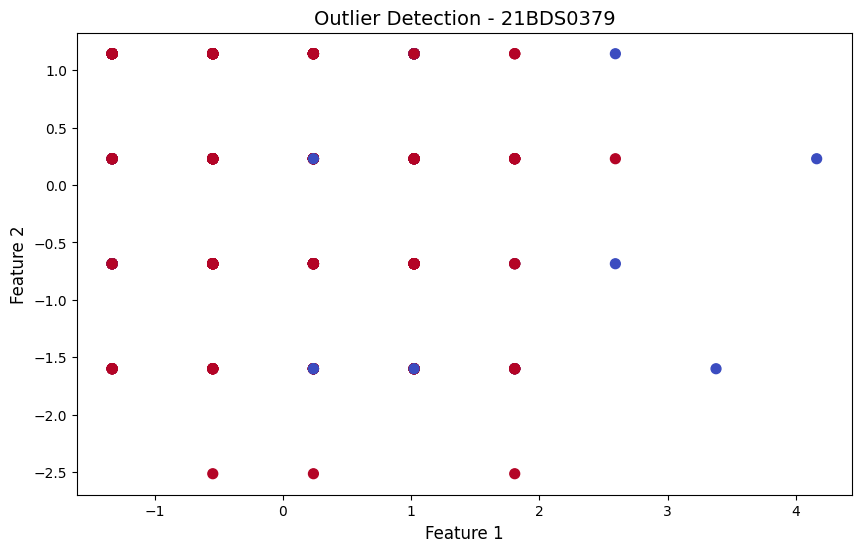

In [ ]:
# Outlier Detection using Isolation Forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers = iso_forest.fit_predict(scaled_data)

# Plotting the Outliers
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=outliers, cmap='coolwarm', s=50)
plt.title("Outlier Detection - 21BDS0379", fontsize=14)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.show()

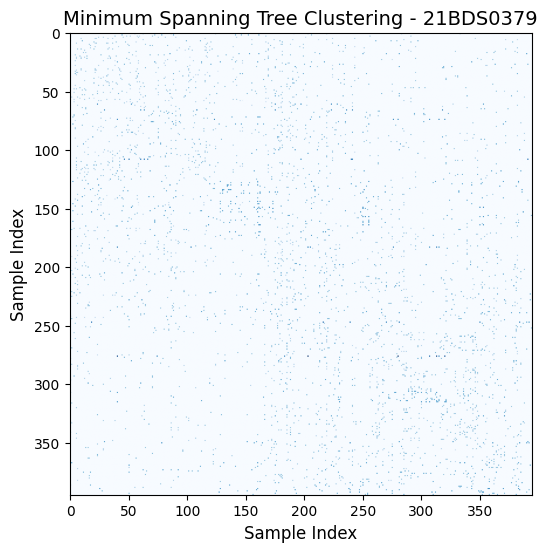

In [ ]:
# Minimum Spanning Tree (MST) for Clustering
distance_matrix = pdist(scaled_data)
square_dist = squareform(distance_matrix)
graph = kneighbors_graph(scaled_data, n_neighbors=10, mode='distance', include_self=True)

# Plot MST
plt.figure(figsize=(10, 6))
plt.imshow(graph.toarray(), cmap='Blues')
plt.title("Minimum Spanning Tree Clustering - 21BDS0379", fontsize=14)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Sample Index", fontsize=12)
plt.show()


In [ ]:
# Evaluate Clustering using Silhouette Score (for GMM as an example)
silhouette_avg = silhouette_score(scaled_data, labels_gmm)
print(f"Silhouette Score for GMM Clustering: {silhouette_avg}")


Silhouette Score for GMM Clustering: 0.1394450326877308


Module 6

In [ ]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import MDS, Isomap
from sklearn.preprocessing import StandardScaler
#from sklearn.factor_analysis import FactorAnalysis #This was removed in recent versions
from factor_analyzer import FactorAnalyzer #Use this instead
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from minisom import MiniSom
import pandas as pd # Import pandas

In [ ]:
# Load the dataset  (Assuming your dataset is in 'MyDataset_EDA.csv')
dataset = pd.read_csv('MyDataset_EDA.csv') # Load the dataset into 'dataset'

# Encoding categorical columns
dataset_encoded = dataset.copy()

# Encoding categorical features (like 'sex', 'address', 'famsize', etc.)
label_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

label_encoder = LabelEncoder()

for col in label_columns:
    dataset_encoded[col] = label_encoder.fit_transform(dataset_encoded[col])

# Extract numerical features (excluding the categorical features and target columns)
numerical_features = dataset_encoded.select_dtypes(include=[np.number])

# Standardizing the features (important for methods like PCA, SVD)
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Roll number (for titles)
roll_no = "21BDS0379"


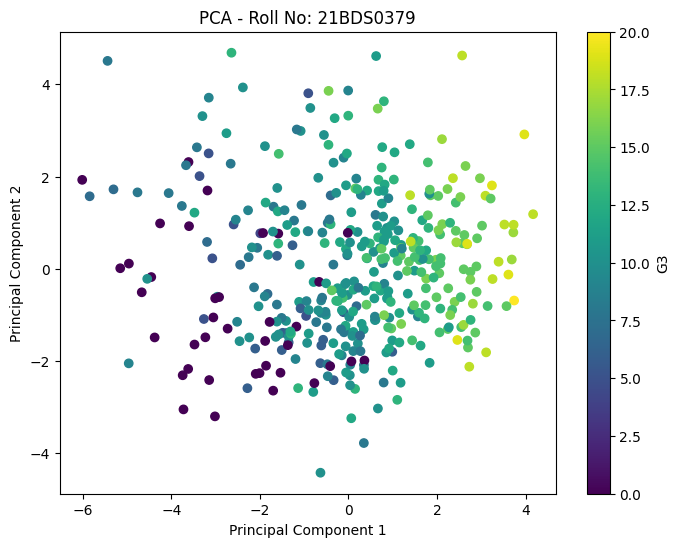

In [ ]:
# 1. Principal Component Analysis (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_features_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dataset_encoded['G3'], cmap='viridis')
plt.title(f"PCA - Roll No: {roll_no}")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='G3')
plt.show()

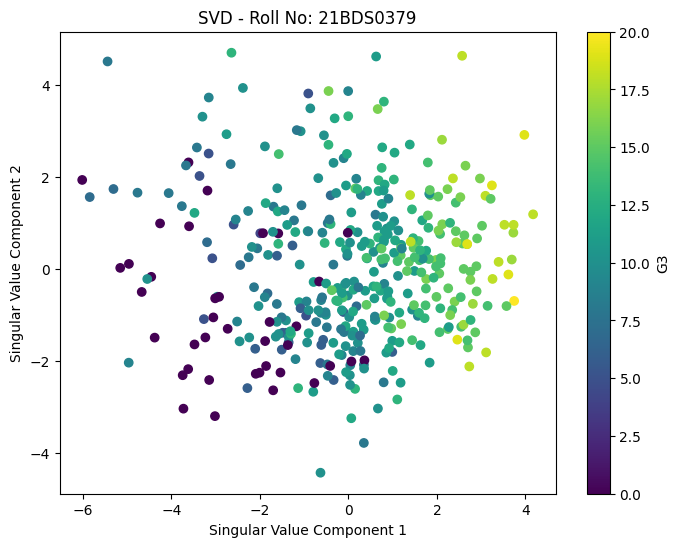

In [ ]:
# 2. Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=2)
svd_result = svd.fit_transform(numerical_features_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(svd_result[:, 0], svd_result[:, 1], c=dataset_encoded['G3'], cmap='viridis')
plt.title(f"SVD - Roll No: {roll_no}")
plt.xlabel('Singular Value Component 1')
plt.ylabel('Singular Value Component 2')
plt.colorbar(label='G3')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


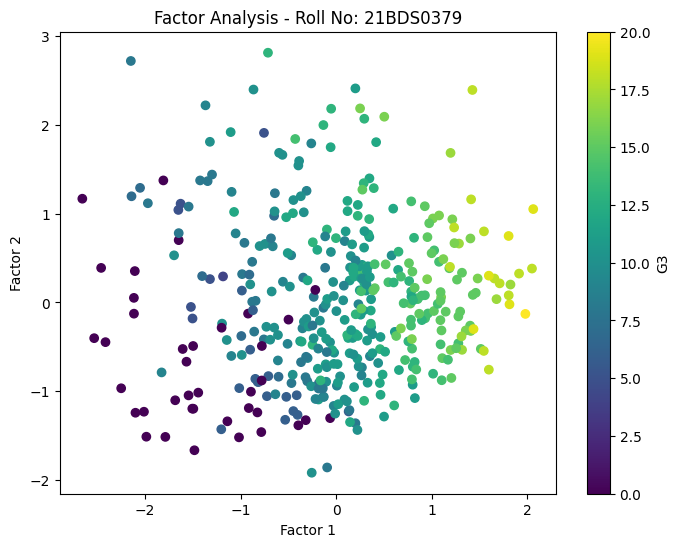

In [ ]:
# 3. Factor Analysis
factor = FactorAnalyzer(n_factors=2, rotation=None) #Updated to use FactorAnalyzer
factor_result = factor.fit_transform(numerical_features_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(factor_result[:, 0], factor_result[:, 1], c=dataset_encoded['G3'], cmap='viridis')
plt.title(f"Factor Analysis - Roll No: {roll_no}")
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.colorbar(label='G3')
plt.show()

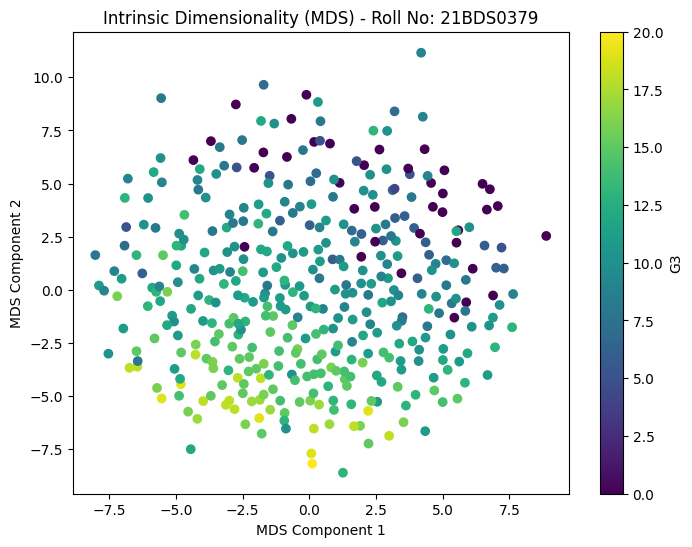

In [ ]:
# 4. Intrinsic Dimensionality (Using MDS to estimate intrinsic dimensionality)
mds = MDS(n_components=2)
mds_result = mds.fit_transform(numerical_features_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(mds_result[:, 0], mds_result[:, 1], c=dataset_encoded['G3'], cmap='viridis')
plt.title(f"Intrinsic Dimensionality (MDS) - Roll No: {roll_no}")
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.colorbar(label='G3')
plt.show()

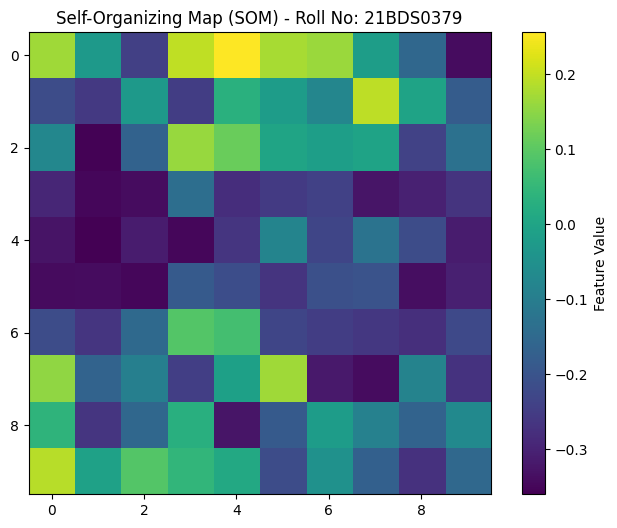

In [ ]:
# 5. Self-Organizing Maps (SOM)
som = MiniSom(x=10, y=10, input_len=numerical_features_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.train(numerical_features_scaled, 100)

# Getting the weights for each node in the SOM
som_result = som.get_weights()

# Visualizing the SOM grid
plt.figure(figsize=(8, 6))
plt.imshow(som_result[:, :, 0], cmap='viridis')  # Visualizing the first feature
plt.title(f"Self-Organizing Map (SOM) - Roll No: {roll_no}")
plt.colorbar(label='Feature Value')
plt.show()



Module 7

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv('MyDataset_EDA.csv')

# Preprocess data: Convert categorical variables to numeric using get_dummies
data_processed = pd.get_dummies(data, drop_first=True)

# Define features (X) and target (y)
X = data_processed.drop(columns=['G3'])
y = data_processed['G3']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=379)

In [ ]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:

# Make predictions on the test set
y_pred = model.predict(X_test)

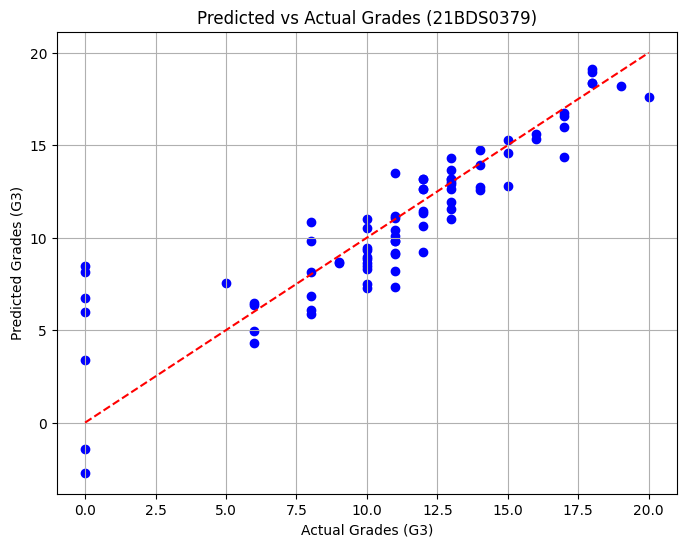

In [ ]:
# Plotting predicted vs actual grades
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # line of perfect prediction
plt.title(f"Predicted vs Actual Grades (21BDS0379)")
plt.xlabel("Actual Grades (G3)")
plt.ylabel("Predicted Grades (G3)")
plt.grid(True)
plt.show()

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [ ]:
# Display evaluation metrics
evaluation_metrics = {
    'Mean Absolute Error (MAE)': mae,
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
    'R-Squared (R2)': r2
}

print("Model Evaluation Metrics:")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 1.511114416734068
Mean Squared Error (MSE): 4.8923133684557065
Root Mean Squared Error (RMSE): 2.2118574475891766
R-Squared (R2): 0.7756449480312431
